# Object Reader Printer

This notebook reads in the objects stored in ObjectsInfoMRT.csv and uses them to create plots. Some of these plots are the ones in the primary research paper, others are only made here.

Simply adding lines to ObjectsInfoMRT.csv should still run smoothly with this code, so long as all the non-citation fields are filled. 

Uncomment the "plt.savefig()" lines to save the figures as pdf files after they are generated. 

See README for more information. 

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

#Reading from the composite file, rather than each individual one. 
f = open('ObjectsInfoMRT.csv', 'r', encoding='utf-8')
lines=f.readlines()
f.close()
dat=lines[0:len(lines)]
num_stars=len(dat)
massI=np.zeros(num_stars)
radiI=np.zeros(num_stars)
masse1I=np.zeros(num_stars)
radie1I=np.zeros(num_stars)
masse2I=np.zeros(num_stars)
radie2I=np.zeros(num_stars)
errI=np.zeros(num_stars)
typeI=np.zeros(num_stars)

#Ordinant is so I can point to typeIndex without making it a numpy array. 
for i in range(num_stars):
    line=dat[i]
    columns=line.split(',')
    massI[i] = columns[1]
    masse1I[i] = columns[2]
    masse2I[i] = columns[3]
    radiI[i] = columns[4]
    radie1I[i] = columns[5]
    radie2I[i] = columns[6]
    if (columns[7] == "Solar System Planet"): 
        typeI[i] = 1
    elif (columns[7] == "Asteroid"): 
        typeI[i] = 2
    elif (columns[7] == "Brown Dwarf"): 
        typeI[i] = 3
    elif (columns[7] == "Comet"): 
        typeI[i] = 4
    elif (columns[7] == "Exoplanet"): 
        typeI[i] = 5
    elif (columns[7] == "Inner Solar System Moon"): 
        typeI[i] = 6
    elif (columns[7] == "Jovian Moon"): 
        typeI[i] = 7
    elif (columns[7] == "Neptunian Moon"): 
        typeI[i] = 8
    elif (columns[7] == "The Sun"): 
        typeI[i] = 9
    elif (columns[7] == "Saturnian Moon"): 
        typeI[i] = 10
    elif (columns[7] == "Star"): 
        typeI[i] = 11
    elif (columns[7] == "Supermassive Black Hole"): 
        typeI[i] = 12
    elif (columns[7] == "Trans Neptunian Object" or columns[7] == "Trans-Neptunian Object"): 
        typeI[i] = 13
    elif (columns[7] == "Uranian Moon"): 
        typeI[i] = 14
    elif (columns[7] == "White Dwarf"): 
        typeI[i] = 15
    else:
        typeI[i] = 0
        print(i)
        print(columns[7])
   
#Error checker
#Dunno why the above comment line is red but awesome.
err = 0.5
# 2 is "allow everything", 0.28 is "a good value", and 0.1 is "stringent"
radieI=np.maximum(radie1I,-radie2I)
masseI=np.maximum(masse1I,-masse2I)
errI = np.maximum((radieI*3.) / (radiI*3.),masseI / massI)
sel=np.where(err > (radieI*3.)/(radiI*3.))
massI=massI[sel]
radiI=radiI[sel]
masseI=masseI[sel]
radieI=radieI[sel]
errI=errI[sel]
typeI=typeI[sel]
radie1I=radie1I[sel]
radie2I=radie2I[sel]
masse1I=masse1I[sel]
masse2I=masse2I[sel]
sel=np.where(err > masseI/massI)
massI=massI[sel]
radiI=radiI[sel]
masseI=masseI[sel]
radieI=radieI[sel]
errI=errI[sel]
typeI=typeI[sel]
radie1I=radie1I[sel]
radie2I=radie2I[sel]
masse1I=masse1I[sel]
masse2I=masse2I[sel]
errTestR=(radieI*3)/(radiI*3)
errTestM=(masseI)/(massI)

i=0
re=6371.
me=5.97e24
ms=1.98847e30
rs=696340

densI=(massI*me)/(4*3.14/3)/(radiI*re)**3/1e12
#Calculating error for density is rather annoying, as it depends on two variables in a not obvious way.
#So we need to try every optoin for the variables, and see which one is the greatest increase
#and which is the greatest decrease.
diff1 = (((massI+masse1I)*me)/(4*3.14/3)/((radiI+radie1I)*re)**3/1e12)
diff2 = (((massI+masse1I)*me)/(4*3.14/3)/((radiI+radie2I)*re)**3/1e12)
diff3 = (((massI+masse2I)*me)/(4*3.14/3)/((radiI+radie1I)*re)**3/1e12)
diff4 = (((massI+masse2I)*me)/(4*3.14/3)/((radiI+radie2I)*re)**3/1e12)
i = 0
dense1I=densI*0. #To make sure these are new arrays, not just pointers to densI. 
dense2I=densI*0.
while (i < len(densI)):
    dense1I[i] = -densI[i] + np.max(np.array([diff1[i], diff2[i], diff3[i], diff4[i]]))
    dense2I[i] = -densI[i] + np.min(np.array([diff1[i], diff2[i], diff3[i], diff4[i]]))
    i=i+1

gI=6.67e-11*(massI*me)/(radiI*re)**2/1e6 

#Black Holes follow a funciton, not observation. 
bhm=np.array([5,10,5e1,1e2,5e2,1e3,5e3,1e4,5e4,1e5,5e5,1e6,5e6,1e7,5e7,1e8,5e8,1e9,5e9,1e10,4e10])
bhm = bhm*ms #mass
bhr = (bhm*2.0*6.67e-11)/(8.988e16) #radius from mass
bhg = 6.67e-11*bhm/bhr**2
bhd = bhm/(4*3.14/3)/(bhr/1000)**3/1e12 #density from mass and radius
bhm = bhm/me #normalize
bhr = bhr/(1000*re) #normalize, the Schwarzchild relation gives a radius in m, not km.
bht = 0.020554/bhm #temperature is related to mass for black holes.

print("objects read and constants defined")

objects read and constants defined


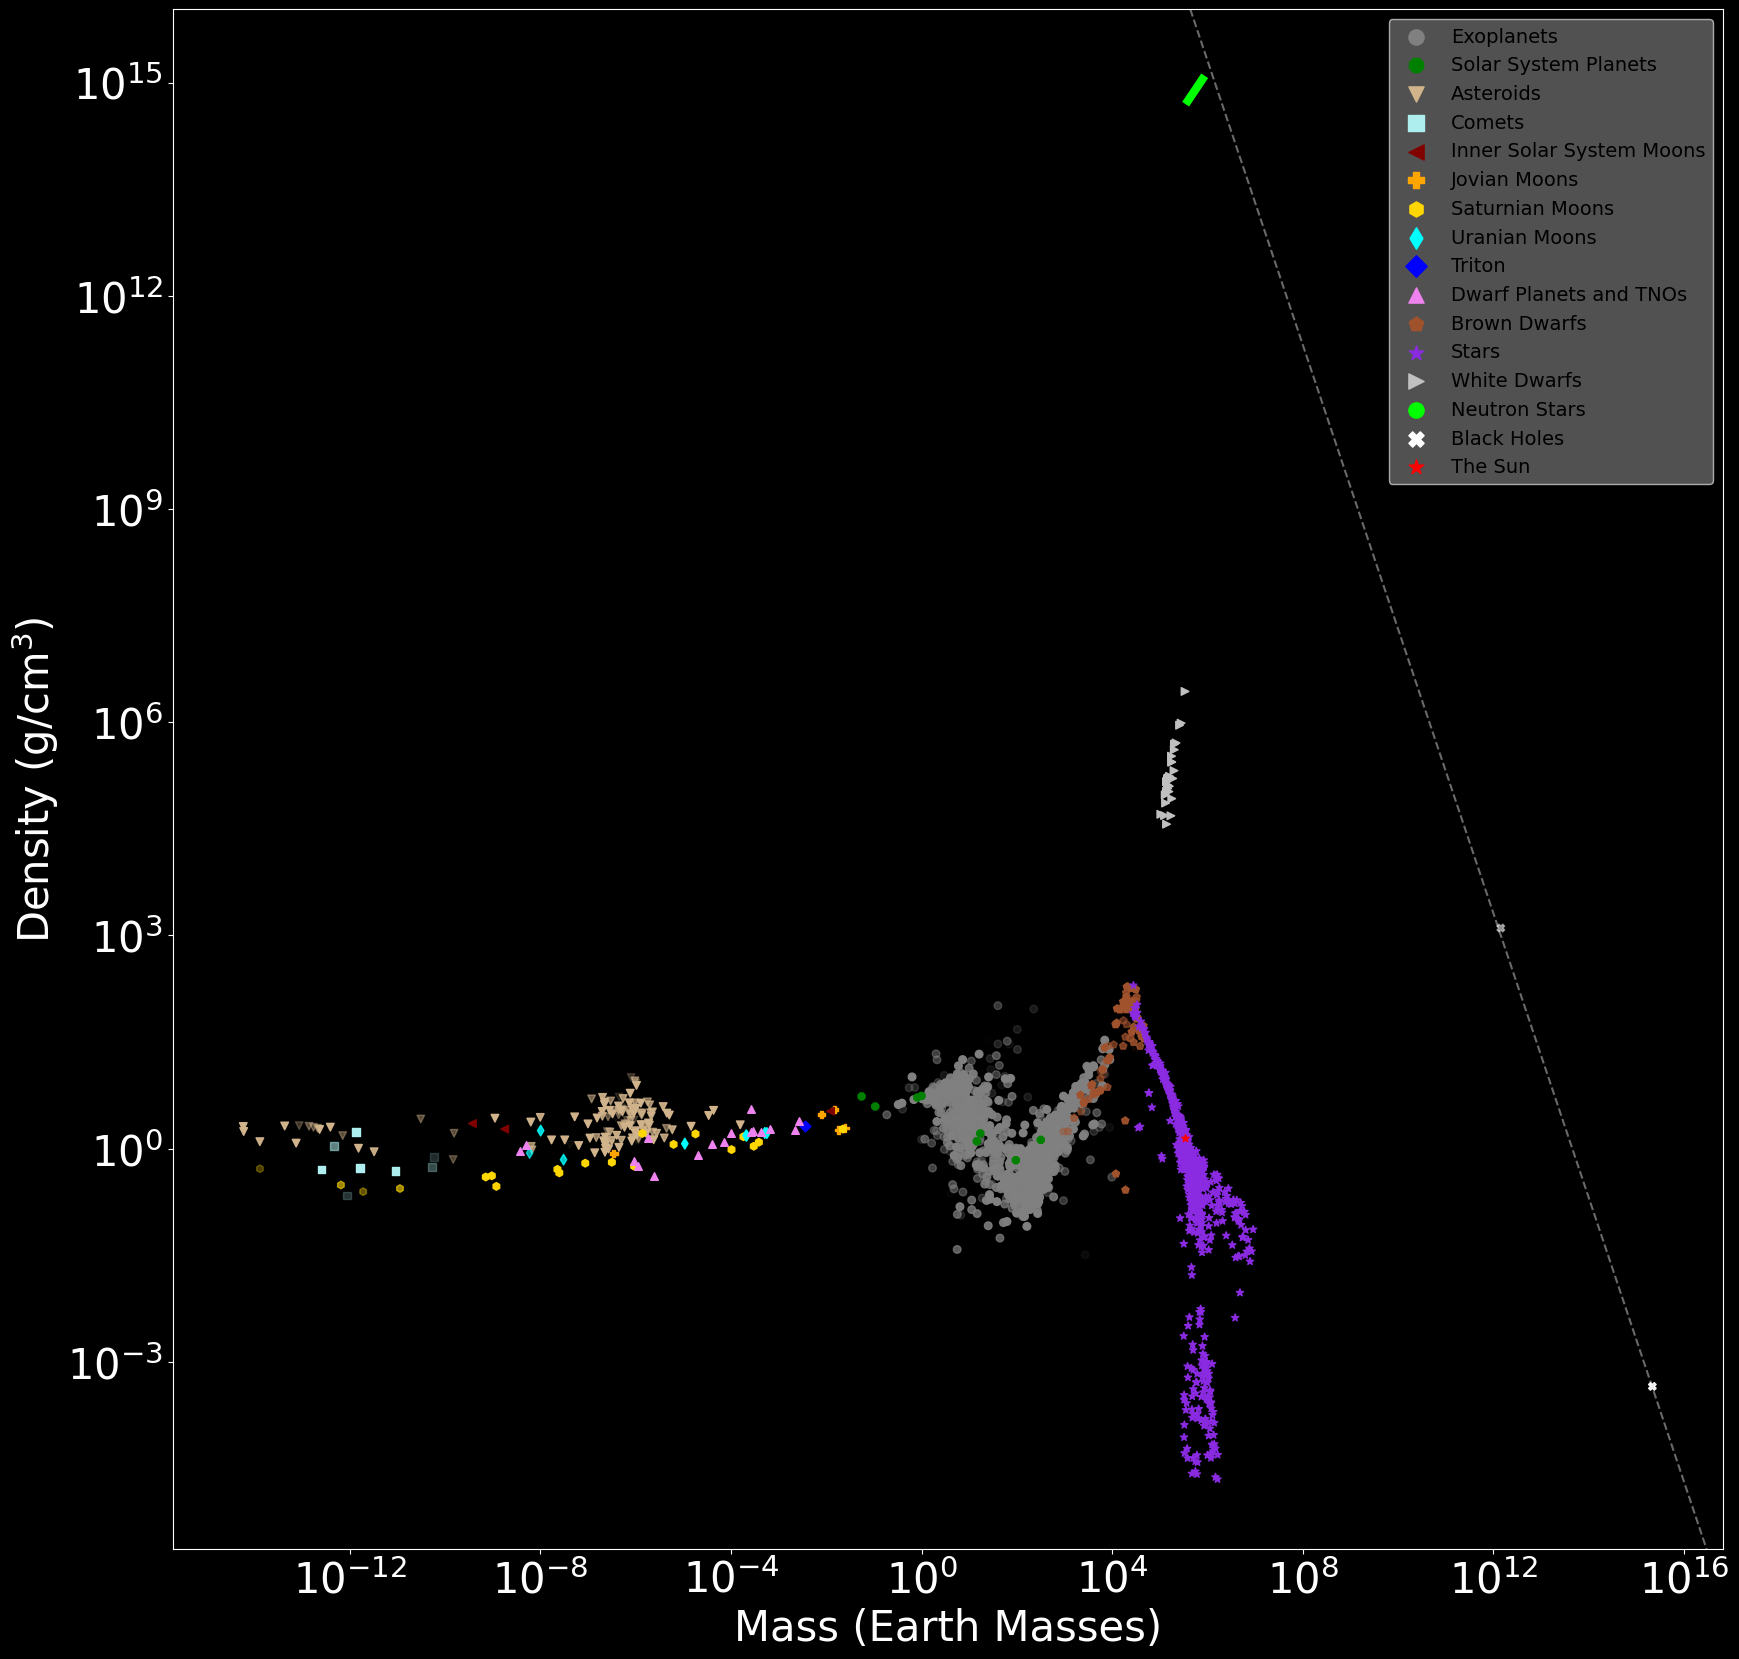

In [2]:
#The main plot, black version. 

size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

# Mass Density Plot
plt.figure(figsize=(20,20), facecolor='black')
ax=plt.axes()
ax.set_facecolor("black")
ax.tick_params(color='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
plt.scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
plt.scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
plt.scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
plt.scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
plt.scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
plt.scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
plt.scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
plt.scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Triton",alpha=alpha[np.where(typeI == 8)],marker="D")
plt.scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
plt.scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
plt.scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
plt.scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
plt.scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
#plt.plot(bhm[0:], bhd[0:], color='dimgray', ls="dashed") #Black Holes
plt.axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
plt.scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=30)
plt.ylabel('Density (g/cm$^3$)', size=30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

#Manual legend so opacity doesn't affect the labels
legend1 = plt.scatter(0,0,color='gray', s=size,label = "Exoplanets",marker="o")
legend2 = plt.scatter(0,0,color='green', s=size, label = "Solar System Planets",marker="8")
legend3 = plt.scatter(0,0,color='tan', s=size, label = "Asteroids",marker="v")
legend4 = plt.scatter(0,0,color='paleturquoise', s=size, label = "Comets",marker="s")
legend5 = plt.scatter(0,0,color='maroon', s=size, label = "Inner Solar System Moons",marker="<")
legend6 = plt.scatter(0,0,color='orange', s=size, label = "Jovian Moons",marker="P")
legend7 = plt.scatter(0,0,color='gold', s=size, label = "Saturnian Moons",marker="h")
legend8 = plt.scatter(0,0,color='cyan', s=size, label = "Uranian Moons",marker="d")
legend88 = plt.scatter(0,0,color='blue', s=size, label = "Triton",marker="D")
legend9 = plt.scatter(0,0,color='violet', s=size, label = "Dwarf Planets and TNOs",marker="^")
legend10 = plt.scatter(0,0,color='sienna', s=size, label = "Brown Dwarfs",marker="p")
legend11 = plt.scatter(0,0,color='blueviolet', s=size, label = "Stars", marker="*")
legend12 = plt.scatter(0,0,color='silver', s=size, label = "White Dwarfs",marker=">")
legend13 = plt.scatter(0,0,color='lime', s=size, label = "Neutron Stars")
legend14 = plt.scatter(0,0,color='white', s=size, label = "Black Holes",marker="X")
legend15 = plt.scatter(0,0,color='red', s=size, label = "The Sun",marker="*")

plt.legend(fontsize=14, markerscale=2, facecolor="#666666", handles = [legend1,legend2,legend3,legend4,legend5,legend6,legend7,legend8,legend88,legend9,legend10,legend11,legend12,legend13,legend14,legend15])

#plt.savefig("MassDensityPlot.pdf", format="pdf")

plt.show()

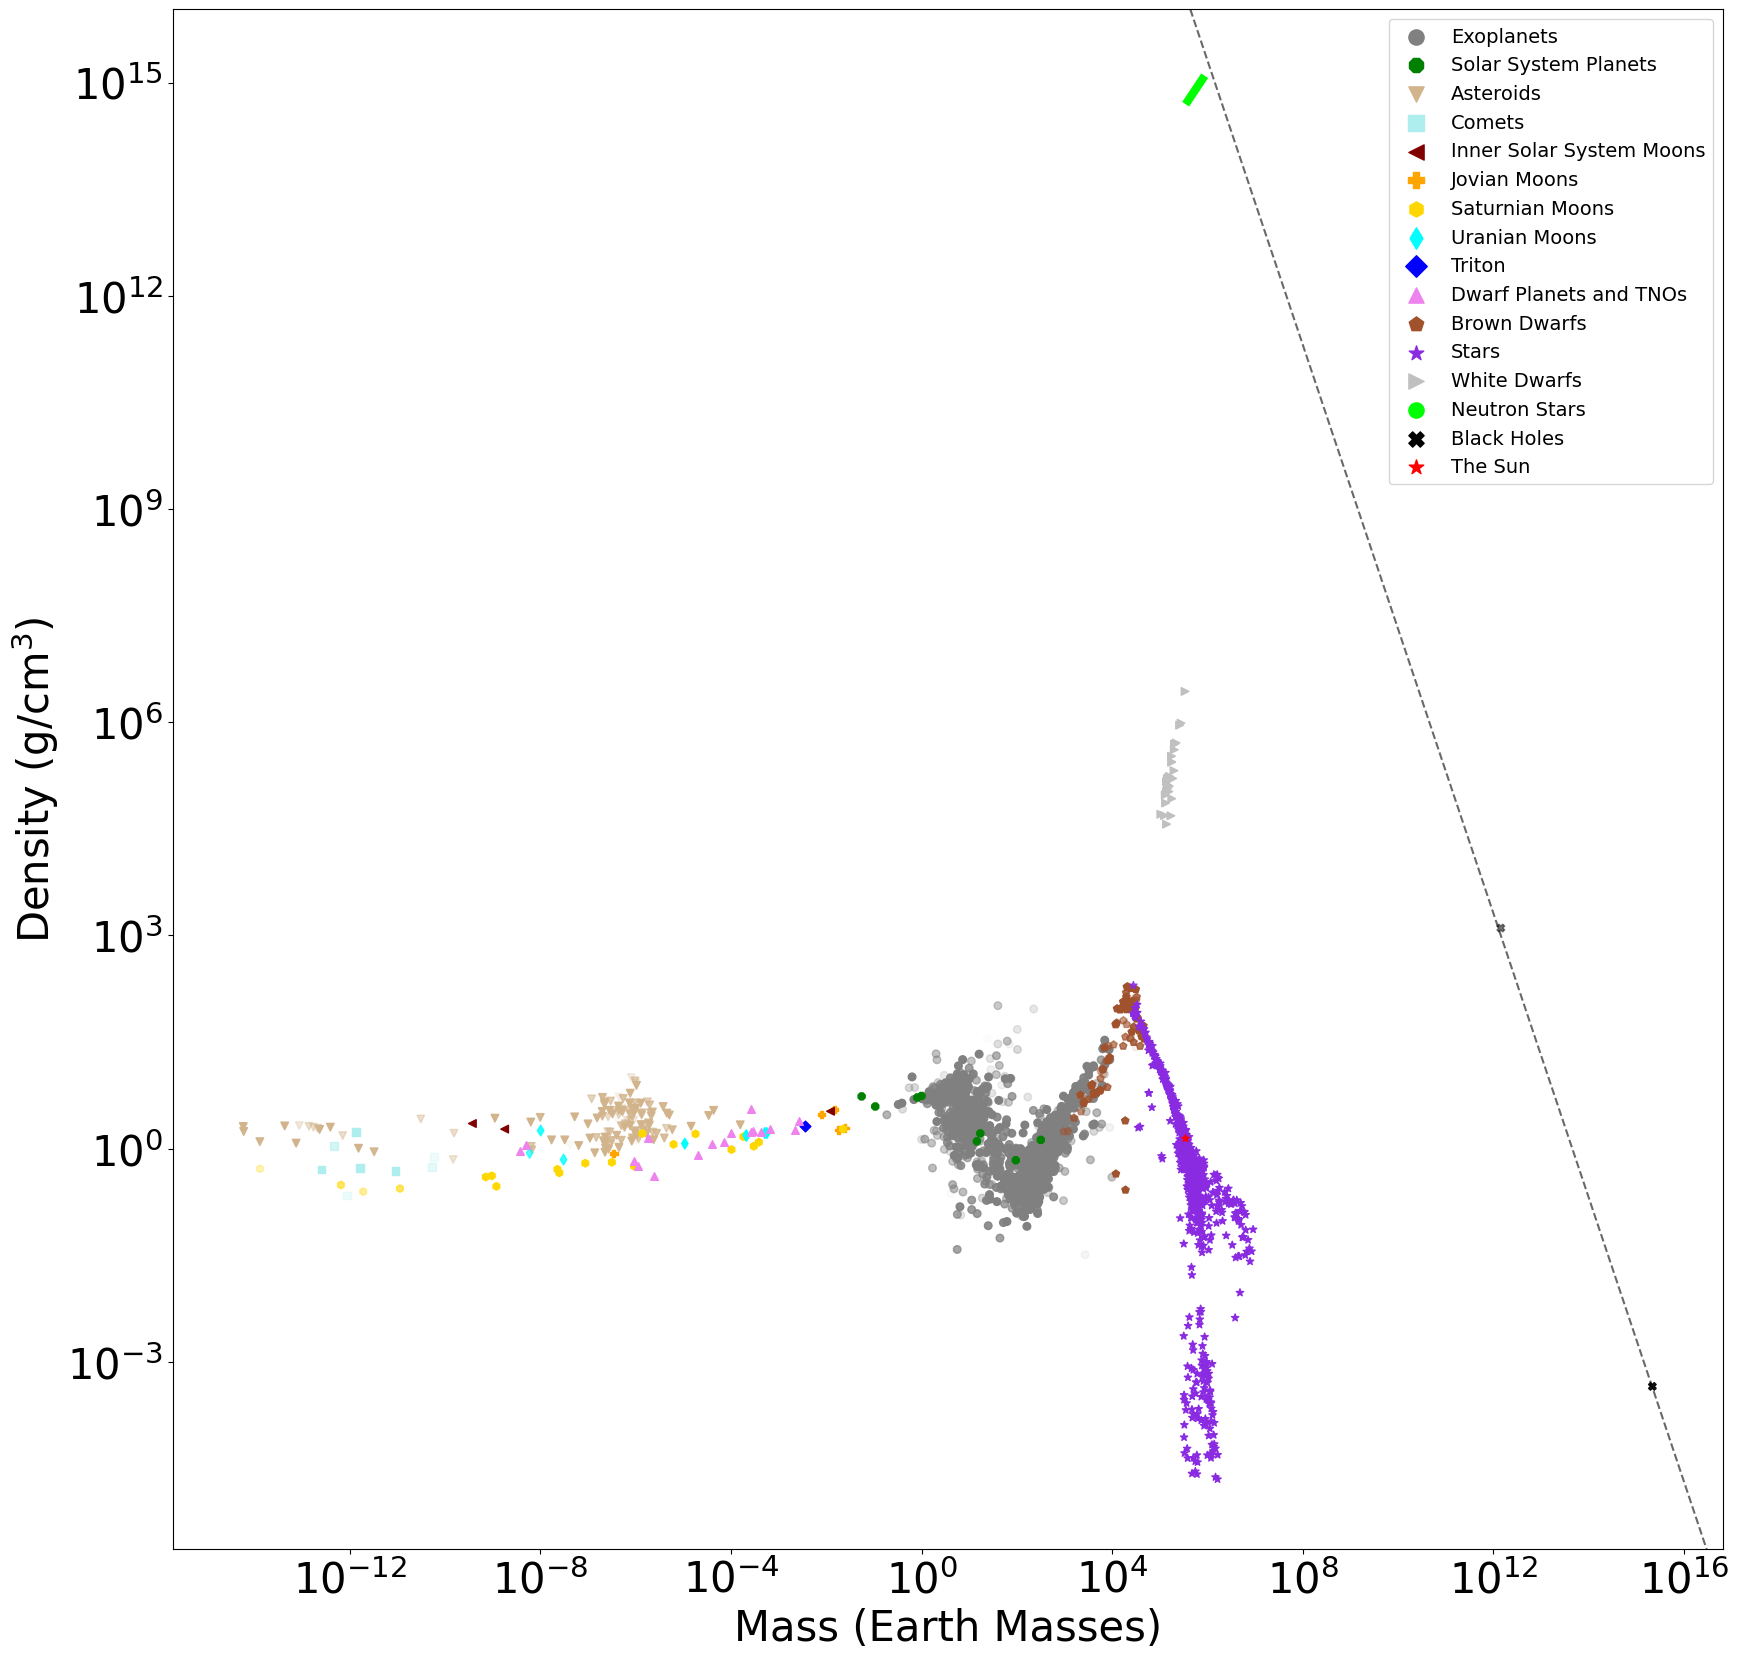

In [3]:
#The main plot, white version. 

# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

# Mass Density Plot
plt.figure(figsize=(20,20), facecolor='white')
ax=plt.axes()
ax.set_facecolor("white")
ax.tick_params(color='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
plt.scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
plt.scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
plt.scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
plt.scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
plt.scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
plt.scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
plt.scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
plt.scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
plt.scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Triton",alpha=alpha[np.where(typeI == 8)],marker="D")
plt.scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
plt.scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
plt.scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
plt.scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
plt.scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
#plt.plot(bhm[0:], bhd[0:], color='dimgray', ls="dashed") #Black Holes
plt.axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
plt.scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=30)
plt.ylabel('Density (g/cm$^3$)', size=30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

#Manual legend so opacity doesn't affect the labels
legend1 = plt.scatter(0,0,color='gray', s=size,label = "Exoplanets",marker="o")
legend2 = plt.scatter(0,0,color='green', s=size, label = "Solar System Planets",marker="8")
legend3 = plt.scatter(0,0,color='tan', s=size, label = "Asteroids",marker="v")
legend4 = plt.scatter(0,0,color='paleturquoise', s=size, label = "Comets",marker="s")
legend5 = plt.scatter(0,0,color='maroon', s=size, label = "Inner Solar System Moons",marker="<")
legend6 = plt.scatter(0,0,color='orange', s=size, label = "Jovian Moons",marker="P")
legend7 = plt.scatter(0,0,color='gold', s=size, label = "Saturnian Moons",marker="h")
legend8 = plt.scatter(0,0,color='cyan', s=size, label = "Uranian Moons",marker="d")
legend88 = plt.scatter(0,0,color='blue', s=size, label = "Triton",marker="D")
legend9 = plt.scatter(0,0,color='violet', s=size, label = "Dwarf Planets and TNOs",marker="^")
legend10 = plt.scatter(0,0,color='sienna', s=size, label = "Brown Dwarfs",marker="p")
legend11 = plt.scatter(0,0,color='blueviolet', s=size, label = "Stars", marker="*")
legend12 = plt.scatter(0,0,color='silver', s=size, label = "White Dwarfs",marker=">")
legend13 = plt.scatter(0,0,color='lime', s=size, label = "Neutron Stars")
legend14 = plt.scatter(0,0,color='black', s=size, label = "Black Holes",marker="X")
legend15 = plt.scatter(0,0,color='red', s=size, label = "The Sun",marker="*")

plt.legend(fontsize=14, markerscale=2,handles = [legend1,legend2,legend3,legend4,legend5,legend6,legend7,legend8,legend88,legend9,legend10,legend11,legend12,legend13,legend14,legend15])

#plt.savefig("MassDensityPlotWhite.pdf", format="pdf")

plt.show()

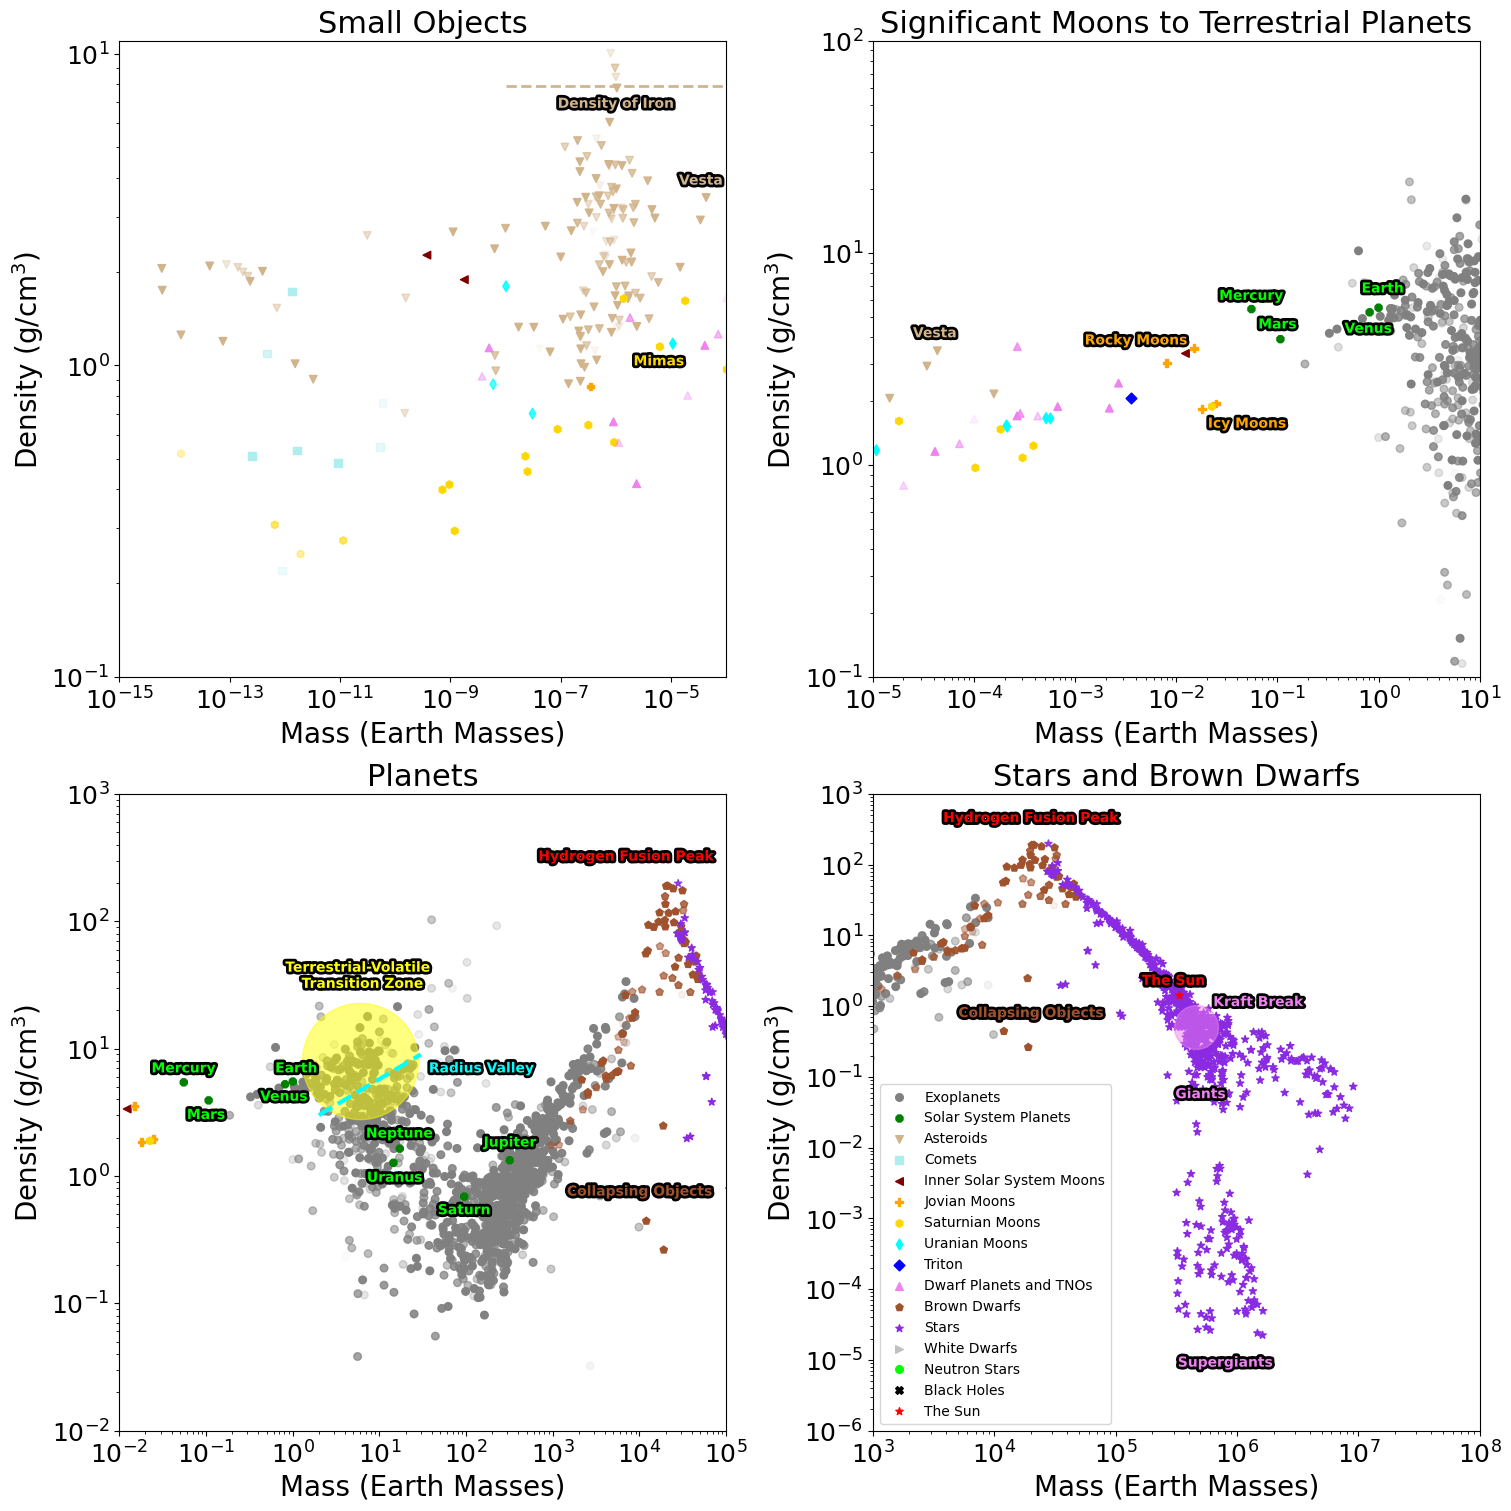

In [4]:
#Zoom in views, white version with internal labels. 

# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(2,2,figsize = (15,15), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-15,1e-4], ylim=[1e-1,11])
axs[i][j].set_title('Small Objects', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tMimas = axs[i][j].text(6e-6,1,"Mimas",color='gold',fontweight='bold',ha='center') 
tMimas.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVesta = axs[i][j].text(3.5e-5,3.8,"Vesta",color='tan',fontweight='bold',ha='center') 
tVesta.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([1e-8,1e-4]),np.array([7.87,7.87]),color='tan', linewidth=2, linestyle='dashed') #density of iron.
tIron= axs[i][j].text(1e-6,6.7,"Density of Iron",color='tan',fontweight='bold',ha='center') 
tIron.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])


i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-2,1e5], ylim=[1e-2,1e3])
axs[i][j].set_title('Planets', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tMercury = axs[i][j].text(5.5e-2,6.5,"Mercury",color='lime',fontweight='bold',ha='center') 
tMercury.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVenus = axs[i][j].text(7.9e-1,3.9,"Venus",color='lime',fontweight='bold',ha='center') 
tVenus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tEarth = axs[i][j].text(1.1,6.5,"Earth",color='lime',fontweight='bold',ha='center') 
tEarth.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMars = axs[i][j].text(1e-1,2.8,"Mars",color='lime',fontweight='bold',ha='center') 
tMars.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tJupiter = axs[i][j].text(3.2e2,1.7,"Jupiter",color='lime',fontweight='bold',ha='center') 
tJupiter.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tSaturn = axs[i][j].text(9.5e1,0.5,"Saturn",color='lime',fontweight='bold',ha='center') 
tSaturn.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tUranus = axs[i][j].text(1.5e1,0.9,"Uranus",color='lime',fontweight='bold',ha='center') 
tUranus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tNeptune = axs[i][j].text(1.7e1,2,"Neptune",color='lime',fontweight='bold',ha='center') 
tNeptune.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tHydrogen = axs[i][j].text(7e3,300,"Hydrogen Fusion Peak",color='red',fontweight='bold',ha='center') 
tHydrogen.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tColl = axs[i][j].text(1e4,0.7,"Collapsing Objects",color='sienna',fontweight='bold',ha='center') 
tColl.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([2,30]),np.array([3,9]),color='cyan', linewidth=3, linestyle='dashed') #density of iron.
tIron= axs[i][j].text(150,6.5,"Radius Valley",color='cyan',fontweight='bold',ha='center') 
tIron.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tTrans = axs[i][j].text(6,30,"Terrestrial-Volatile \n Transition Zone",color='yellow',fontweight='bold',ha='center') 
tTrans.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].scatter(6,8,color='yellow',s=7000,alpha=0.5)

i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e3,1e8], ylim=[1e-6,1e3])
axs[i][j].set_title('Stars and Brown Dwarfs', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

axs[i][j].legend(handles = [legend1,legend2,legend3,legend4,legend5,legend6,legend7,legend8,legend88,legend9,legend10,legend11,legend12,legend13,legend14,legend15])

tHydrogen = axs[i][j].text(2e4,400,"Hydrogen Fusion Peak",color='red',fontweight='bold',ha='center') 
tHydrogen.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tColl = axs[i][j].text(2e4,0.7,"Collapsing Objects",color='sienna',fontweight='bold',ha='center') 
tColl.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tGiants2 = axs[i][j].text(8e5,8e-6,"Supergiants",color='violet',fontweight='bold',ha='center') 
tGiants2.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tGiants = axs[i][j].text(5e5,5e-2,"Giants",color='violet',fontweight='bold',ha='center') 
tGiants.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tSun = axs[i][j].text(3e5,2,"The Sun",color='red',fontweight='bold',ha='center') 
tSun.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tKraft = axs[i][j].text(1.5e6,1,"Kraft Break",color='violet',fontweight='bold',ha='center') 
tKraft.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].scatter(4.6e5,0.5,color='violet',s=1000,alpha=0.5)


i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-5,1e1], ylim=[1e-1,1e2])
axs[i][j].set_title('Significant Moons to Terrestrial Planets', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tVesta = axs[i][j].text(4.1e-5,4,"Vesta",color='tan',fontweight='bold',ha='center') 
tVesta.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMercury = axs[i][j].text(5.5e-2,6,"Mercury",color='lime',fontweight='bold',ha='center') 
tMercury.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVenus = axs[i][j].text(7.9e-1,4.2,"Venus",color='lime',fontweight='bold',ha='center') 
tVenus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tEarth = axs[i][j].text(1.1,6.5,"Earth",color='lime',fontweight='bold',ha='center') 
tEarth.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMars = axs[i][j].text(1e-1,4.4,"Mars",color='lime',fontweight='bold',ha='center') 
tMars.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tRMoon = axs[i][j].text(4e-3,3.7,"Rocky Moons",color='orange',fontweight='bold',ha='center') 
tRMoon.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tIMoon = axs[i][j].text(5e-2,1.5,"Icy Moons",color='orange',fontweight='bold',ha='center') 
tIMoon.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])

#plt.savefig("ZoomViewsWhiteAnnotated.pdf", format="pdf")

plt.show()

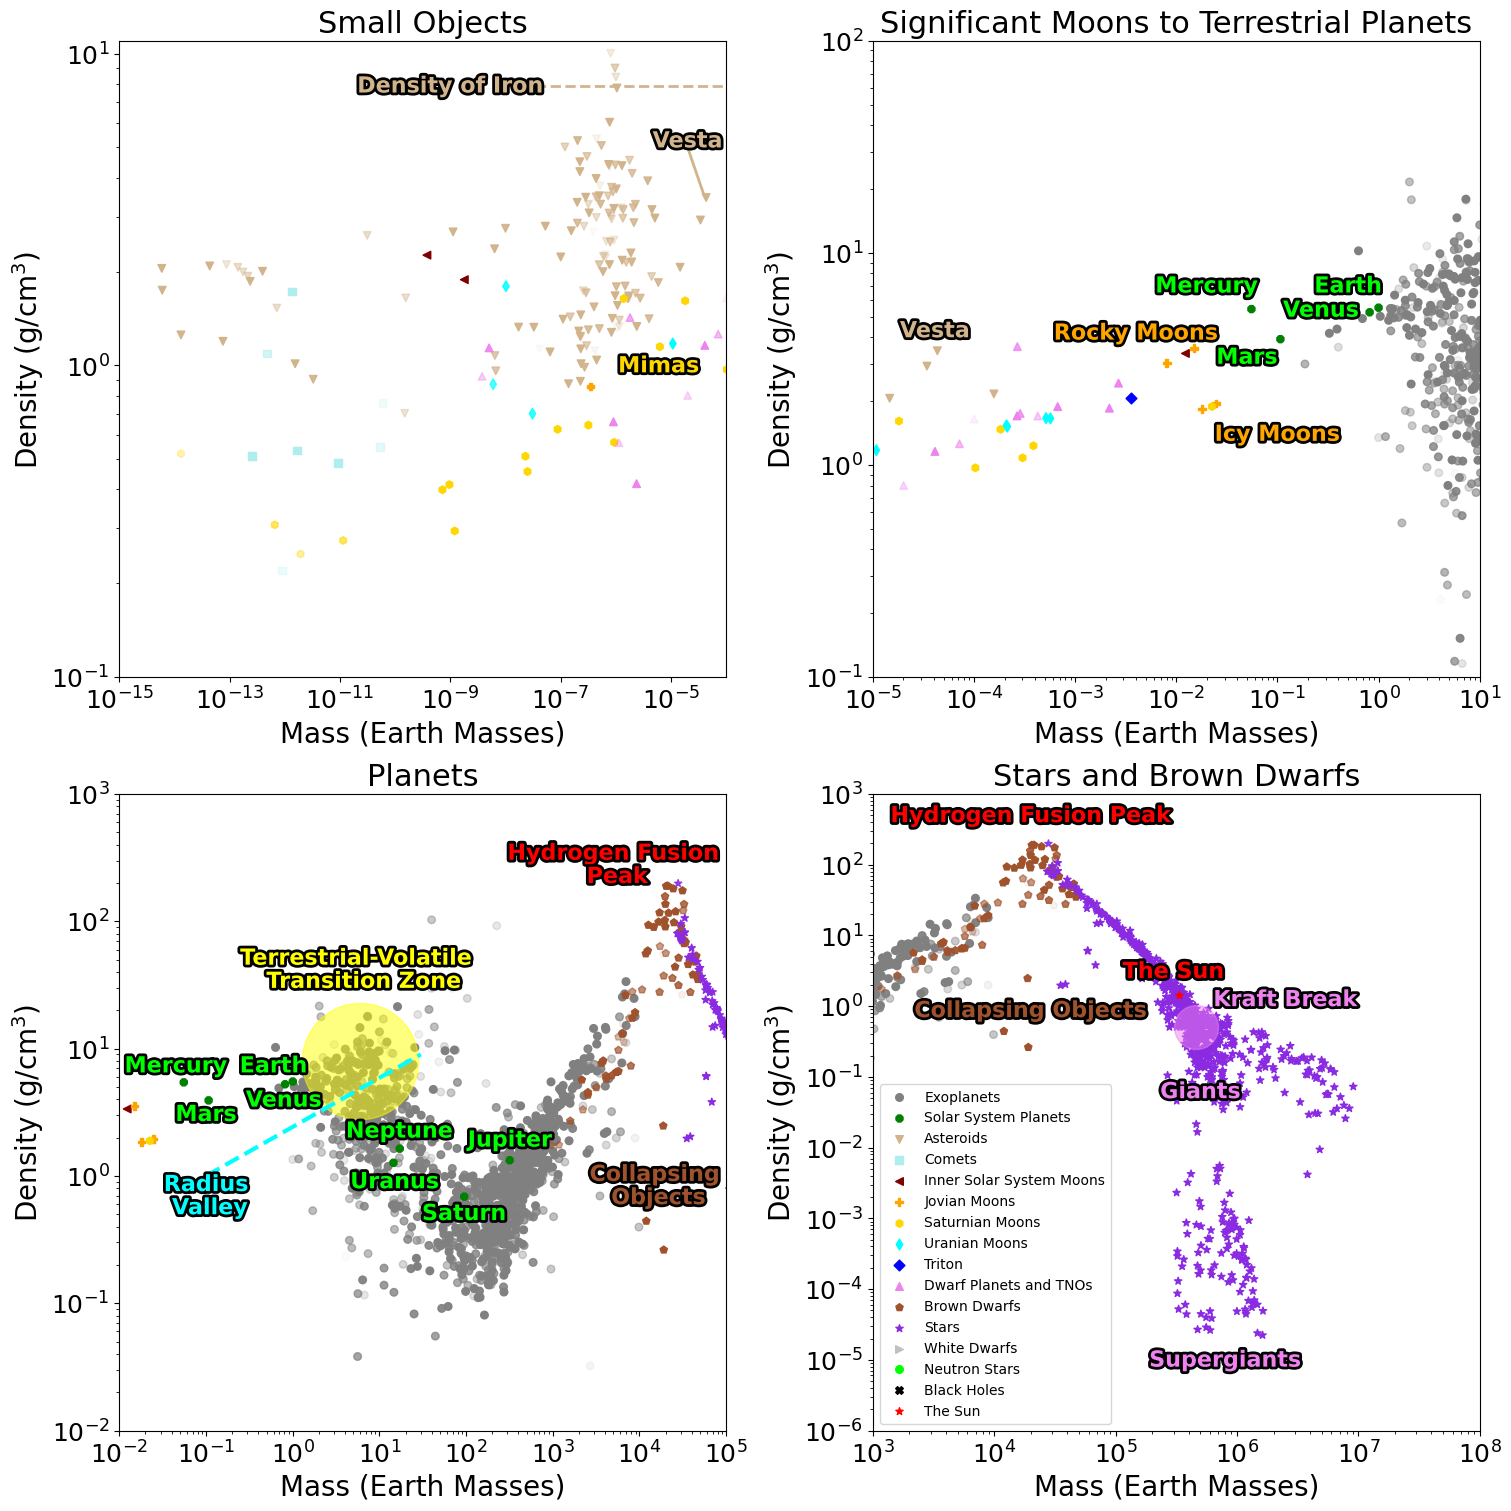

In [5]:
#Zoom in views, white background. Large labels.

# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(2,2,figsize = (15,15), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-15,1e-4], ylim=[1e-1,11])
axs[i][j].set_title('Small Objects', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tMimas = axs[i][j].text(6e-6,0.95,"Mimas",color='gold',fontweight='bold',ha='center',fontsize=16) 
tMimas.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([2e-5,4e-5]),np.array([5,3.5]),color='tan', linewidth=2) #density of iron.
tVesta = axs[i][j].text(2e-5,5,"Vesta",color='tan',fontweight='bold',ha='center',fontsize=16) 
tVesta.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([1e-8,1e-4]),np.array([7.87,7.87]),color='tan', linewidth=2, linestyle='dashed') #density of iron.
tIron= axs[i][j].text(1e-9,7.5,"Density of Iron",color='tan',fontweight='bold',ha='center',fontsize=16) 
tIron.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])

i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-2,1e5], ylim=[1e-2,1e3])
axs[i][j].set_title('Planets', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tMercury = axs[i][j].text(4.5e-2,6.5,"Mercury",color='lime',fontweight='bold',ha='center',fontsize=16) 
tMercury.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVenus = axs[i][j].text(7.9e-1,3.5,"Venus",color='lime',fontweight='bold',ha='center',fontsize=16) 
tVenus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tEarth = axs[i][j].text(0.6,6.5,"Earth",color='lime',fontweight='bold',ha='center',fontsize=16) 
tEarth.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMars = axs[i][j].text(1e-1,2.7,"Mars",color='lime',fontweight='bold',ha='center',fontsize=16) 
tMars.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tJupiter = axs[i][j].text(3.2e2,1.7,"Jupiter",color='lime',fontweight='bold',ha='center',fontsize=16) 
tJupiter.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tSaturn = axs[i][j].text(9.5e1,0.45,"Saturn",color='lime',fontweight='bold',ha='center',fontsize=16) 
tSaturn.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tUranus = axs[i][j].text(1.5e1,0.8,"Uranus",color='lime',fontweight='bold',ha='center',fontsize=16) 
tUranus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tNeptune = axs[i][j].text(1.7e1,2,"Neptune",color='lime',fontweight='bold',ha='center',fontsize=16) 
tNeptune.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tHydrogen = axs[i][j].text(5e3,200,"Hydrogen Fusion\n Peak",color='red',fontweight='bold',ha='center',fontsize=16) 
tHydrogen.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tColl = axs[i][j].text(1.5e4,0.6,"Collapsing\n Objects",color='sienna',fontweight='bold',ha='center',fontsize=16) 
tColl.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].plot(np.array([0.1,30]),np.array([1,9]),color='cyan', linewidth=3, linestyle='dashed') #density of iron.
tIron= axs[i][j].text(0.1,0.5,"Radius\n Valley",color='cyan',fontweight='bold',ha='center',fontsize=16) 
tIron.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tTrans = axs[i][j].text(6,30,"Terrestrial-Volatile \n Transition Zone",color='yellow',fontweight='bold',ha='center',fontsize=16) 
tTrans.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].scatter(6,8,color='yellow',s=7000,alpha=0.5)

i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e3,1e8], ylim=[1e-6,1e3])
axs[i][j].set_title('Stars and Brown Dwarfs', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

axs[i][j].legend(handles = [legend1,legend2,legend3,legend4,legend5,legend6,legend7,legend8,legend88,legend9,legend10,legend11,legend12,legend13,legend14,legend15])

tHydrogen = axs[i][j].text(2e4,400,"Hydrogen Fusion Peak",color='red',fontweight='bold',ha='center',fontsize=16) 
tHydrogen.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tColl = axs[i][j].text(2e4,0.7,"Collapsing Objects",color='sienna',fontweight='bold',ha='center',fontsize=16) 
tColl.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tGiants2 = axs[i][j].text(8e5,8e-6,"Supergiants",color='violet',fontweight='bold',ha='center',fontsize=16) 
tGiants2.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tGiants = axs[i][j].text(5e5,5e-2,"Giants",color='violet',fontweight='bold',ha='center',fontsize=16) 
tGiants.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tSun = axs[i][j].text(3e5,2.5,"The Sun",color='red',fontweight='bold',ha='center',fontsize=16) 
tSun.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tKraft = axs[i][j].text(2.5e6,1,"Kraft Break",color='violet',fontweight='bold',ha='center',fontsize=16) 
tKraft.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
axs[i][j].scatter(4.6e5,0.5,color='violet',s=1000,alpha=0.5)


i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-5,1e1], ylim=[1e-1,1e2])
axs[i][j].set_title('Significant Moons to Terrestrial Planets', fontsize = 22)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 20)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 20)
axs[i][j].tick_params(axis='both', labelsize=18)

tVesta = axs[i][j].text(4.1e-5,4,"Vesta",color='tan',fontweight='bold',ha='center',fontsize=16) 
tVesta.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMercury = axs[i][j].text(2e-2,6.5,"Mercury",color='lime',fontweight='bold',ha='center',fontsize=16) 
tMercury.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tVenus = axs[i][j].text(2.7e-1,5,"Venus",color='lime',fontweight='bold',ha='center',fontsize=16) 
tVenus.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tEarth = axs[i][j].text(0.5,6.5,"Earth",color='lime',fontweight='bold',ha='center',fontsize=16) 
tEarth.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tMars = axs[i][j].text(5e-2,3,"Mars",color='lime',fontweight='bold',ha='center',fontsize=16) 
tMars.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tRMoon = axs[i][j].text(4e-3,3.9,"Rocky Moons",color='orange',fontweight='bold',ha='center',fontsize=16) 
tRMoon.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])
tIMoon = axs[i][j].text(1e-1,1.3,"Icy Moons",color='orange',fontweight='bold',ha='center',fontsize=16) 
tIMoon.set_path_effects([pe.withStroke(linewidth=4, foreground='black')])

#plt.savefig("ZoomViewsWhiteAnnotatedBig.pdf", format="pdf")

plt.show()

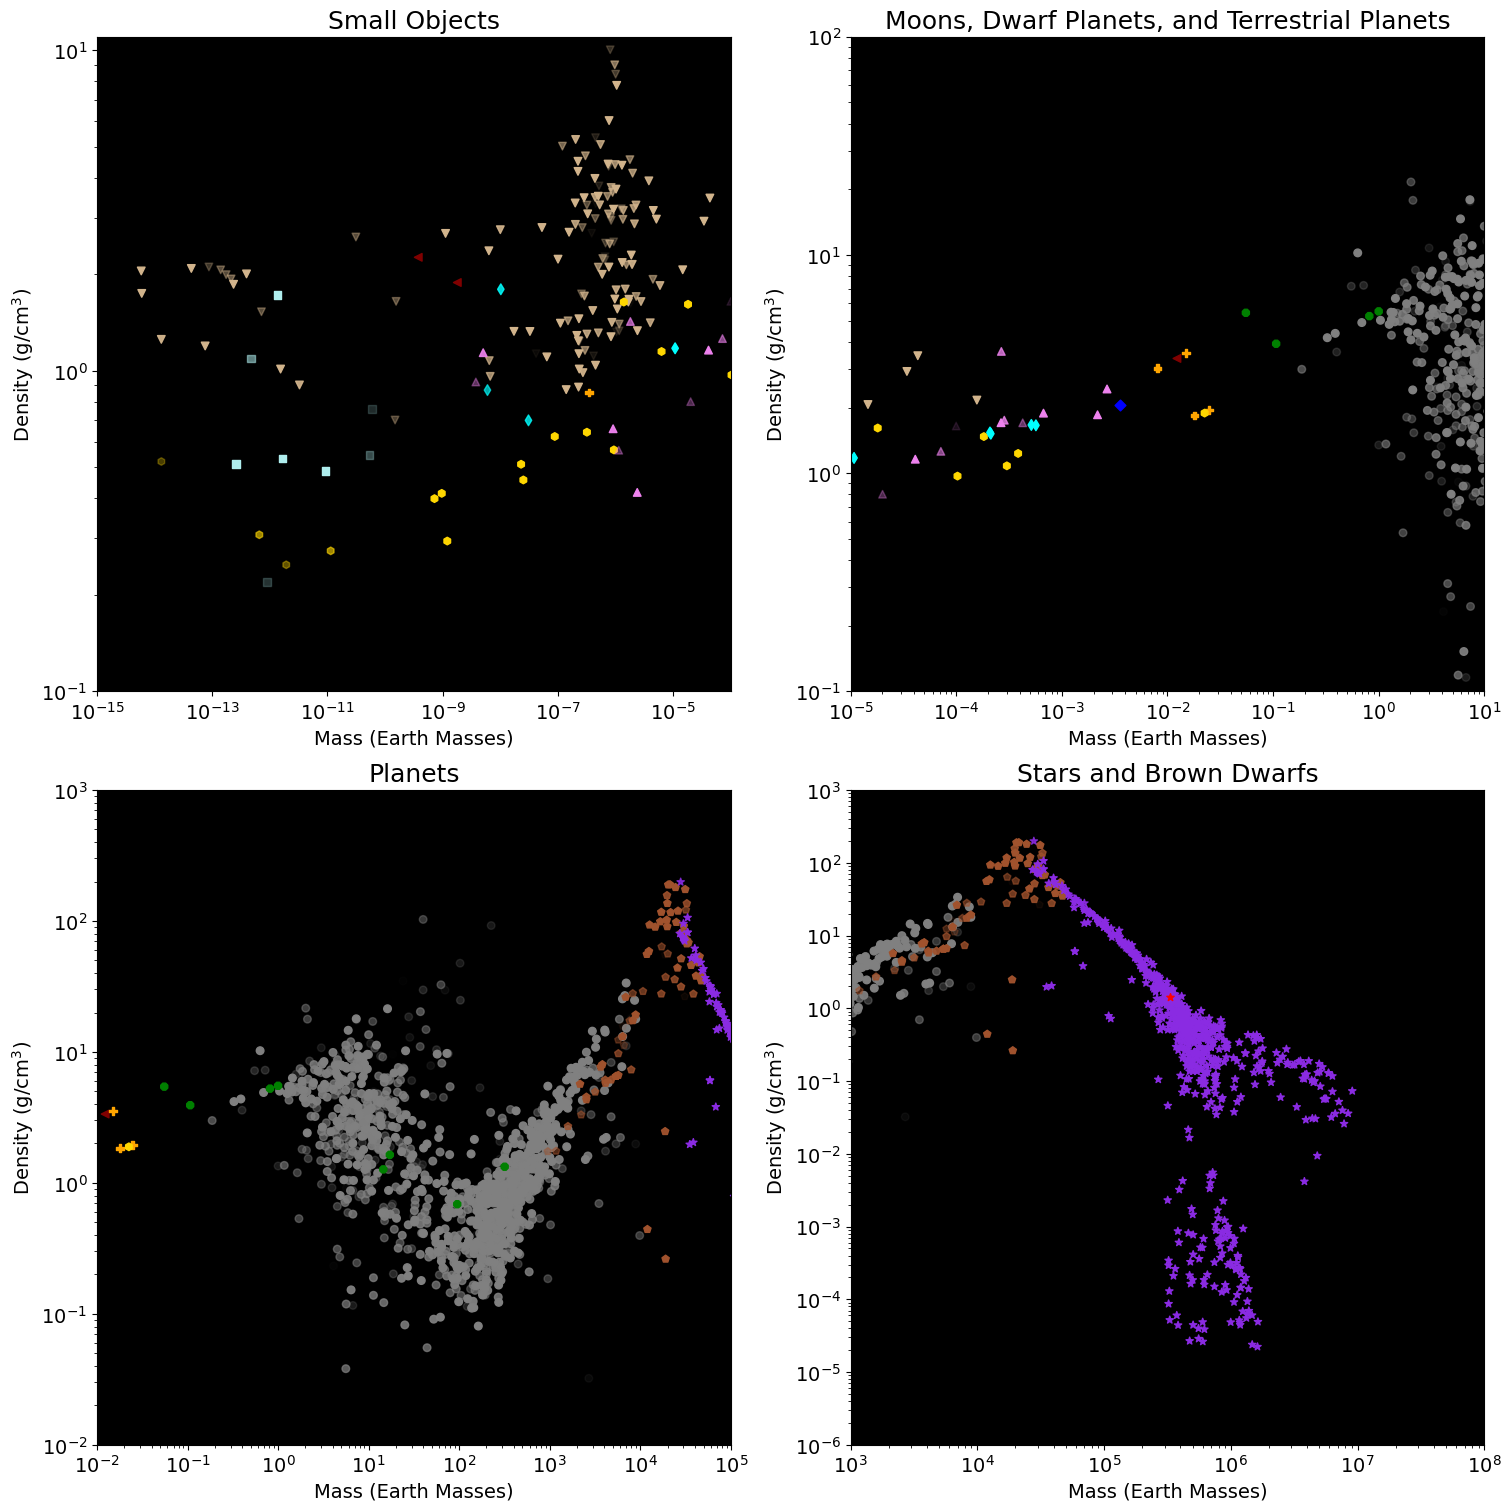

In [6]:
#Zoom in views, black version. Without internal labels. 

# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(2,2,figsize = (15,15), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-15,1e-4], ylim=[1e-1,11])
axs[i][j].set_title('Small Objects', fontsize = 18)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 14)
axs[i][j].tick_params(axis='both', labelsize=14)


i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-2,1e5], ylim=[1e-2,1e3])
axs[i][j].set_title('Planets', fontsize = 18)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 14)
axs[i][j].tick_params(axis='both', labelsize=14)


i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e3,1e8], ylim=[1e-6,1e3])
axs[i][j].set_title('Stars and Brown Dwarfs', fontsize = 18)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 14)
axs[i][j].tick_params(axis='both', labelsize=14)

i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xscale='log', yscale='log', xlim=[1e-5,1e1], ylim=[1e-1,1e2])
axs[i][j].set_title('Moons, Dwarf Planets, and Terrestrial Planets', fontsize = 18)
axs[i][j].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i][j].set_ylabel('Density (g/cm$^3$)', fontsize = 14)
axs[i][j].tick_params(axis='both', labelsize=14)

#plt.savefig("ZoomViews.pdf", format="pdf")

plt.show()

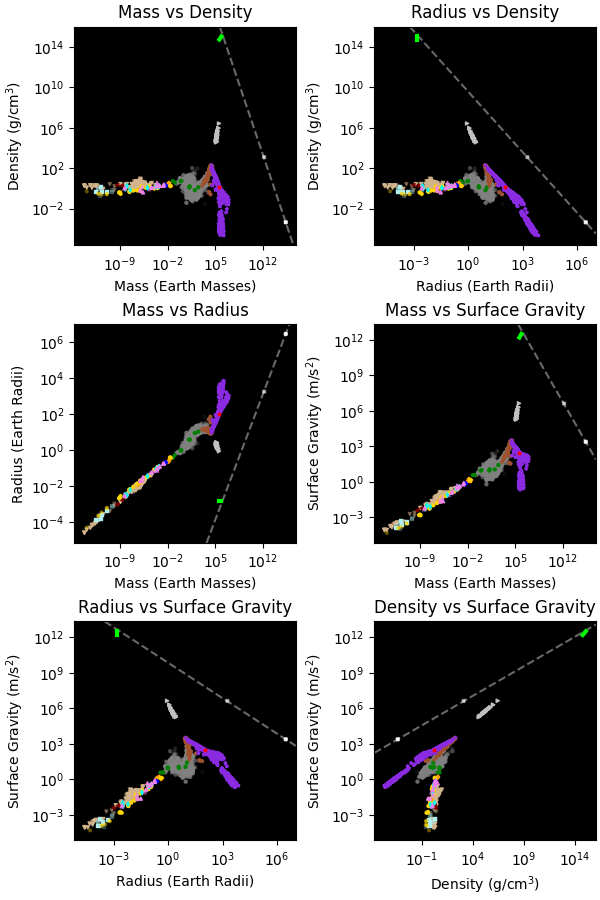

In [9]:
#Alternate views of other variables besides mass and density. Includes radius and surface gravity. 

# More Bulky Graphs
size = 5
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(3,2,figsize = (6,9), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=3) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Density (g/cm$^3$)', 
           title = 'Mass vs Density', xscale='log', yscale='log')

i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],radiI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],radiI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],radiI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],radiI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],radiI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],radiI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],radiI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],radiI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],radiI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],radiI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],radiI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],radiI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],radiI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],radiI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhr[0]), slope=1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],radiI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Radius (Earth Radii)', 
           title = 'Mass vs Radius', xscale='log', yscale='log')

i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(massI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhg[0]), slope=-1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Mass vs Surface Gravity', xscale='log', yscale='log')

###BEEEEEEEEEEEEEEEEEP
#CONTINUE FROM HERE EDITOR!
#If you dno't know what this means that means Iforgot to remove this comment

i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(radiI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(radiI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(radiI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(radiI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(radiI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(radiI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(radiI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(radiI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(radiI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(radiI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(radiI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(radiI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(radiI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhr[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(radiI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([10/re,10/re]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Radius (Earth Radii)', ylabel='Density (g/cm$^3$)', 
           title = 'Radius vs Density', xscale='log', yscale='log')

i=2
j=0

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(radiI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(radiI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(radiI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(radiI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(radiI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(radiI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(radiI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(radiI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(radiI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(radiI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(radiI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(radiI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(radiI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhr[0],bhg[0]), slope=-1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(radiI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([10/re,10/re]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Radius (Earth Radii)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Radius vs Surface Gravity', xscale='log', yscale='log')

i=2
j=1

# Mass Density Plot
axs[i][j].set_facecolor("black")
axs[i][j].scatter(densI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(densI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(densI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(densI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(densI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(densI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(densI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(densI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(densI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(densI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(densI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(densI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(densI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(densI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(densI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhd[0],bhg[0]), slope=0.5 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(densI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Density (g/cm$^3$)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Density vs Surface Gravity', xscale='log', yscale='log')

#plt.savefig("AltVariableViews.pdf", format="pdf")

plt.show()

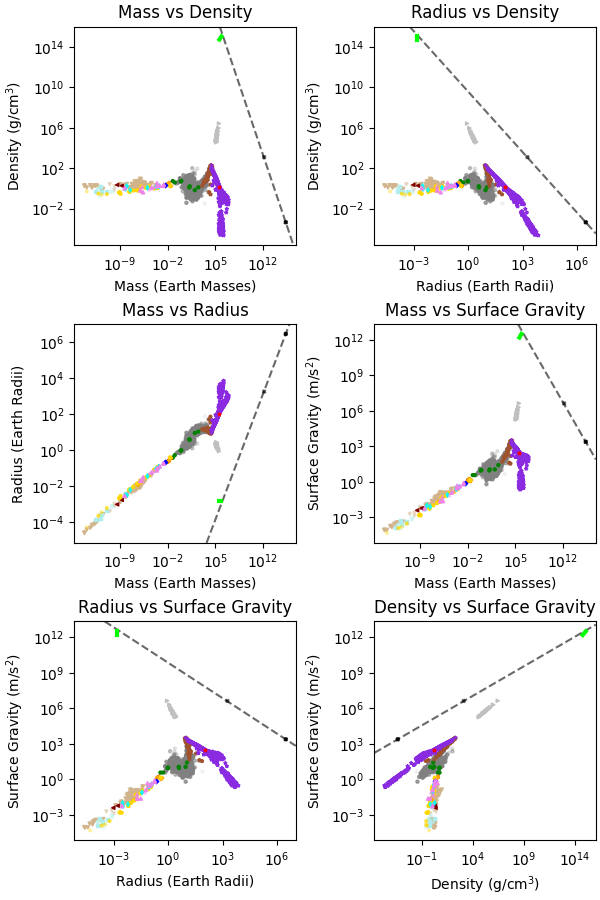

In [10]:
#Same as above cell, but WHITE background.

# More Bulky Graphs
size = 5
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(3,2,figsize = (6,9), layout = "constrained") 
i = 0
j = 0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=3) #Neutron Star Zone
#plt.ylim([0.1,10])
axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Density (g/cm$^3$)', 
           title = 'Mass vs Density', xscale='log', yscale='log')

i=1
j=0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],radiI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],radiI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],radiI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],radiI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],radiI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],radiI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],radiI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],radiI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],radiI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],radiI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],radiI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],radiI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],radiI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],radiI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhr[0]), slope=1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],radiI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Radius (Earth Radii)', 
           title = 'Mass vs Radius', xscale='log', yscale='log')

i=1
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(massI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(massI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(massI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(massI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(massI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(massI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(massI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(massI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(massI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(massI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(massI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(massI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(massI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(massI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(massI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhm[0],bhg[0]), slope=-1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(massI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Mass (Earth Masses)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Mass vs Surface Gravity', xscale='log', yscale='log')

###BEEEEEEEEEEEEEEEEEP
#CONTINUE FROM HERE EDITOR!
#If you dno't know what this means that means Iforgot to remove this comment

i=0
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(radiI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(radiI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(radiI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(radiI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(radiI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(radiI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(radiI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(radiI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(radiI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(radiI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(radiI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(radiI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(radiI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhr[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(radiI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([10/re,10/re]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Radius (Earth Radii)', ylabel='Density (g/cm$^3$)', 
           title = 'Radius vs Density', xscale='log', yscale='log')

i=2
j=0

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(radiI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(radiI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(radiI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(radiI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(radiI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(radiI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(radiI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(radiI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(radiI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(radiI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(radiI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(radiI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(radiI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(radiI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhr[0],bhg[0]), slope=-1 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(radiI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([10/re,10/re]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Radius (Earth Radii)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Radius vs Surface Gravity', xscale='log', yscale='log')

i=2
j=1

# Mass Density Plot
axs[i][j].set_facecolor("white")
axs[i][j].scatter(densI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i][j].scatter(densI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i][j].scatter(densI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i][j].scatter(densI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i][j].scatter(densI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i][j].scatter(densI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i][j].scatter(densI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i][j].scatter(densI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i][j].scatter(densI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i][j].scatter(densI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 13)],marker="^")
axs[i][j].scatter(densI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i][j].scatter(densI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i][j].scatter(densI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i][j].scatter(densI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='red', s=size, label = "The Sun",alpha=alpha[np.where(typeI == 9)],marker="*")
axs[i][j].scatter(densI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i][j].axline((bhd[0],bhg[0]), slope=0.5 ,color='dimgray', ls="dashed")#Black Holes
axs[i][j].scatter(densI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i][j].plot(np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=3) #Neutron Star Zone

axs[i][j].set(xlabel='Density (g/cm$^3$)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Density vs Surface Gravity', xscale='log', yscale='log')

#plt.savefig("AltVariableViewsWhite.pdf", format="pdf")

plt.show()

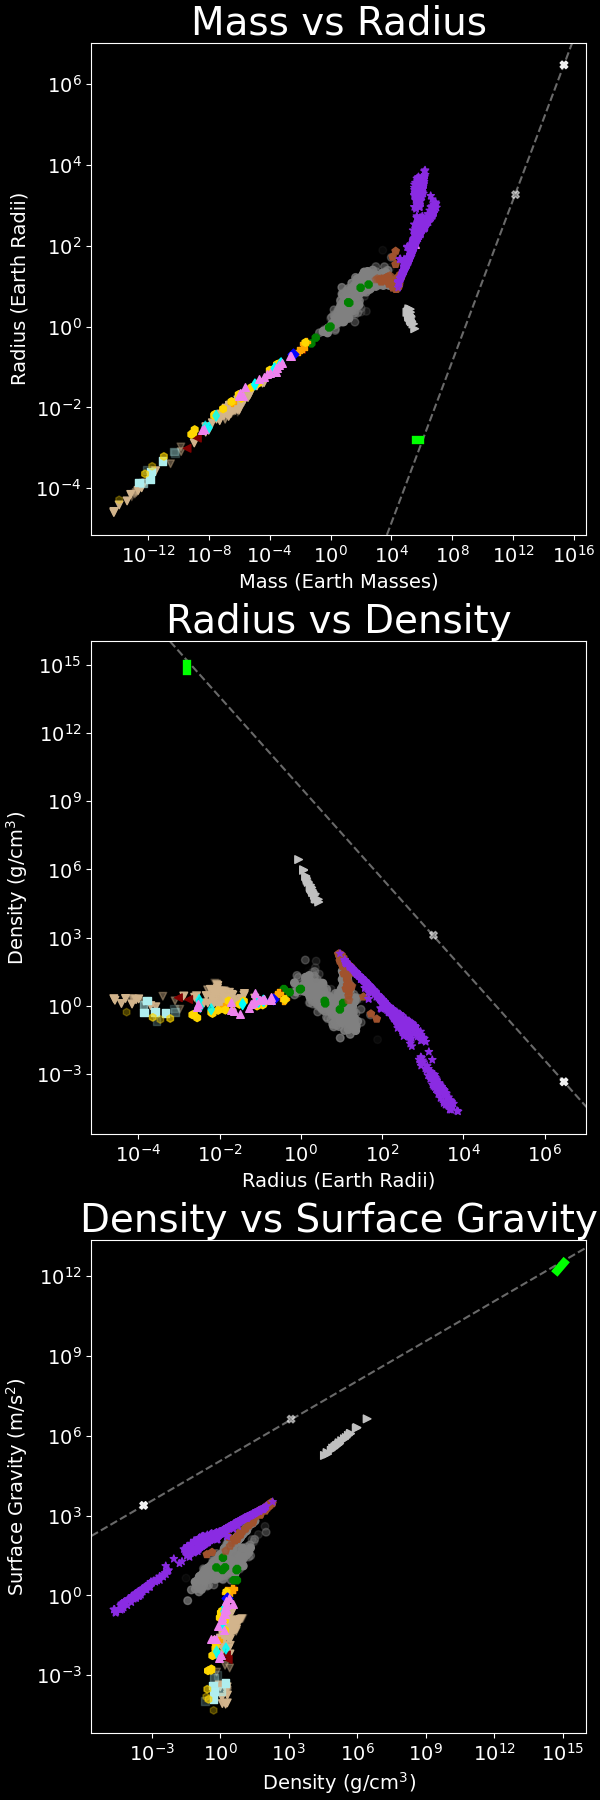

In [11]:
#Selected alternate views for the poster. 

# More Bulky Graphs
size = 30
# Set opacity values based on error. 
alpha = errI*0.
i = 0
maxErr = 0.5
minErr = 0.1
while (i < len(errI)):
    if (maxErr < errI[i]):
        alpha[i] = 0.
    elif (minErr > errI[i]):
        alpha[i] = 1.
    else:
        alpha[i] = ((maxErr - errI[i])/(maxErr - minErr))
        #Looks to scale correctly, at min-err goes to 1, at max-err goes to 0. Just gotta dile however desired.
    i=i+1

# sel=np.where((radiI*3)*err > radieI*3)
# sel=np.where(massI*err > masseI)

fig, axs = plt.subplots(3,1,figsize = (6,18), layout = "constrained", facecolor='black') 
i = 0
j = 0

axs[i].set_facecolor("black")
axs[i].tick_params(color='white')
axs[i].xaxis.label.set_color('white')
axs[i].yaxis.label.set_color('white')
axs[i].tick_params(colors='white')
axs[i].spines['bottom'].set_color('white')
axs[i].spines['top'].set_color('white')
axs[i].spines['left'].set_color('white')
axs[i].spines['right'].set_color('white')
axs[i].scatter(massI[np.where(typeI == 5)],radiI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i].scatter(massI[np.where(typeI == 1)],radiI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i].scatter(massI[np.where(typeI == 2)],radiI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i].scatter(massI[np.where(typeI == 4)],radiI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i].scatter(massI[np.where(typeI == 6)],radiI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i].scatter(massI[np.where(typeI == 7)],radiI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i].scatter(massI[np.where(typeI == 10)],radiI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i].scatter(massI[np.where(typeI == 14)],radiI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i].scatter(massI[np.where(typeI == 8)],radiI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i].scatter(massI[np.where(typeI == 9)],radiI[np.where(typeI == 9)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
axs[i].scatter(massI[np.where(typeI == 13)],radiI[np.where(typeI == 13)],color='violet', s=size,marker="^")
axs[i].scatter(massI[np.where(typeI == 3)],radiI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i].scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i].scatter(massI[np.where(typeI == 15)],radiI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i].scatter(massI[np.where(typeI == 0)],radiI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i].axline((bhm[0],bhr[0]), slope=1 ,color='dimgray', ls="dashed")#Black Holes
axs[i].scatter(massI[np.where(typeI == 12)],radiI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i].plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=6) #Neutron Star Zone

axs[i].set(xlabel='Mass (Earth Masses)', ylabel='Radius (Earth Radii)', 
           title = 'Mass vs Radius', xscale='log', yscale='log')
axs[i].set_title('Mass vs Radius', color='white', fontsize = 28)
axs[i].set_xlabel('Mass (Earth Masses)', fontsize = 14)
axs[i].set_ylabel('Radius (Earth Radii)',fontsize = 14)
axs[i].tick_params(axis = 'both', labelsize = 14)

i=1
j=0

axs[i].set_facecolor("black")
axs[i].tick_params(color='white')
axs[i].xaxis.label.set_color('white')
axs[i].yaxis.label.set_color('white')
axs[i].tick_params(colors='white')
axs[i].spines['bottom'].set_color('white')
axs[i].spines['top'].set_color('white')
axs[i].spines['left'].set_color('white')
axs[i].spines['right'].set_color('white')
axs[i].scatter(radiI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i].scatter(radiI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i].scatter(radiI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i].scatter(radiI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i].scatter(radiI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i].scatter(radiI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i].scatter(radiI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i].scatter(radiI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i].scatter(radiI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i].scatter(radiI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
axs[i].scatter(radiI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size,marker="^")
axs[i].scatter(radiI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i].scatter(radiI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i].scatter(radiI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i].scatter(radiI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i].axline((bhr[0],bhd[0]), slope=-2 ,color='dimgray', ls="dashed")#Black Holes
axs[i].scatter(radiI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i].plot(np.array([10/re,10/re]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone

axs[i].set(xlabel='Radius (Earth Radii)', ylabel='Density (g/cm$^3$)', 
           title = 'Radius vs Density', xscale='log', yscale='log')
axs[i].set_title('Radius vs Density', color='white', fontsize = 28)
axs[i].set_xlabel('Radius (Earth Radii)', fontsize = 14)
axs[i].set_ylabel('Density (g/cm$^3$)',fontsize = 14)
axs[i].tick_params(axis = 'both', labelsize = 14)

i=2
j=0

axs[i].set_facecolor("black")
axs[i].tick_params(color='white')
axs[i].xaxis.label.set_color('white')
axs[i].yaxis.label.set_color('white')
axs[i].tick_params(colors='white')
axs[i].spines['bottom'].set_color('white')
axs[i].spines['top'].set_color('white')
axs[i].spines['left'].set_color('white')
axs[i].spines['right'].set_color('white')
axs[i].scatter(densI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size,label = "Exoplanets",alpha=alpha[np.where(typeI == 5)],marker="o")
axs[i].scatter(densI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size, label = "Solar System Planets",alpha=alpha[np.where(typeI == 1)],marker="8")
axs[i].scatter(densI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size, label = "Asteroids",alpha=alpha[np.where(typeI == 2)],marker="v")
axs[i].scatter(densI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size, label = "Comets",alpha=alpha[np.where(typeI == 4)],marker="s")
axs[i].scatter(densI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size, label = "Inner Solar System Moons",alpha=alpha[np.where(typeI == 6)],marker="<")
axs[i].scatter(densI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size, label = "Jovian Moons",alpha=alpha[np.where(typeI == 7)],marker="P")
axs[i].scatter(densI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size, label = "Saturnian Moons",alpha=alpha[np.where(typeI == 10)],marker="h")
axs[i].scatter(densI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size, label = "Uranian Moons",alpha=alpha[np.where(typeI == 14)],marker="d")
axs[i].scatter(densI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size, label = "Neptunian Moons",alpha=alpha[np.where(typeI == 8)],marker="D")
axs[i].scatter(densI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='violet', s=size, label = "Dwarf Planets and TNOs",alpha=alpha[np.where(typeI == 9)],marker="^")
axs[i].scatter(densI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size,marker="^")
axs[i].scatter(densI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size, label = "Brown Dwarfs",alpha=alpha[np.where(typeI == 3)],marker="p")
axs[i].scatter(densI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size, label = "Stars",alpha=alpha[np.where(typeI == 11)], marker="*")
axs[i].scatter(densI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size, label = "White Dwarfs",alpha=alpha[np.where(typeI == 15)],marker=">")
axs[i].scatter(densI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='lime', s=size, label = "Neutron Stars")
axs[i].axline((bhd[0],bhg[0]), slope=0.5 ,color='dimgray', ls="dashed")#Black Holes
axs[i].scatter(densI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='white', s=size, label = "Black Holes", zorder = 100,alpha=alpha[np.where(typeI == 12)],marker="X")
axs[i].plot(np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone

axs[i].set(xlabel='Density (g/cm$^3$)', ylabel='Surface Gravity (m/s$^2$)', 
           title = 'Density vs Surface Gravity', xscale='log', yscale='log')
axs[i].set_title('Density vs Surface Gravity', color='white', fontsize = 28)
axs[i].set_xlabel('Density (g/cm$^3$)', fontsize = 14)
axs[i].set_ylabel('Surface Gravity (m/s$^2$)',fontsize = 14)
axs[i].tick_params(axis = 'both', labelsize = 14)

#plt.savefig("ThreePlots.pdf", format="pdf")

plt.show()

<function matplotlib.pyplot.show(block=None)>

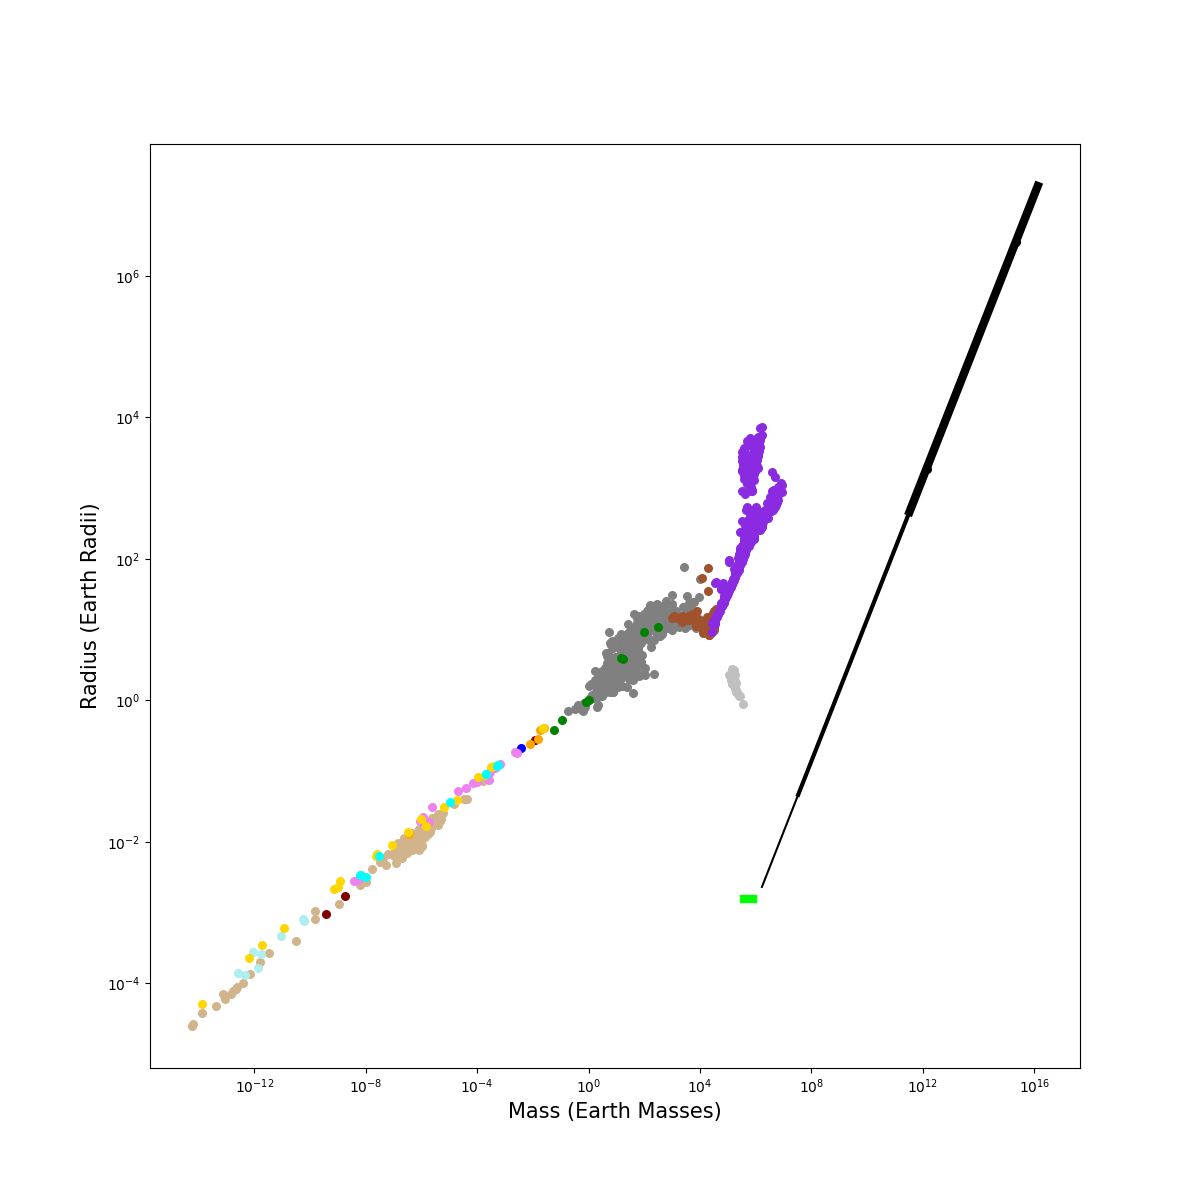

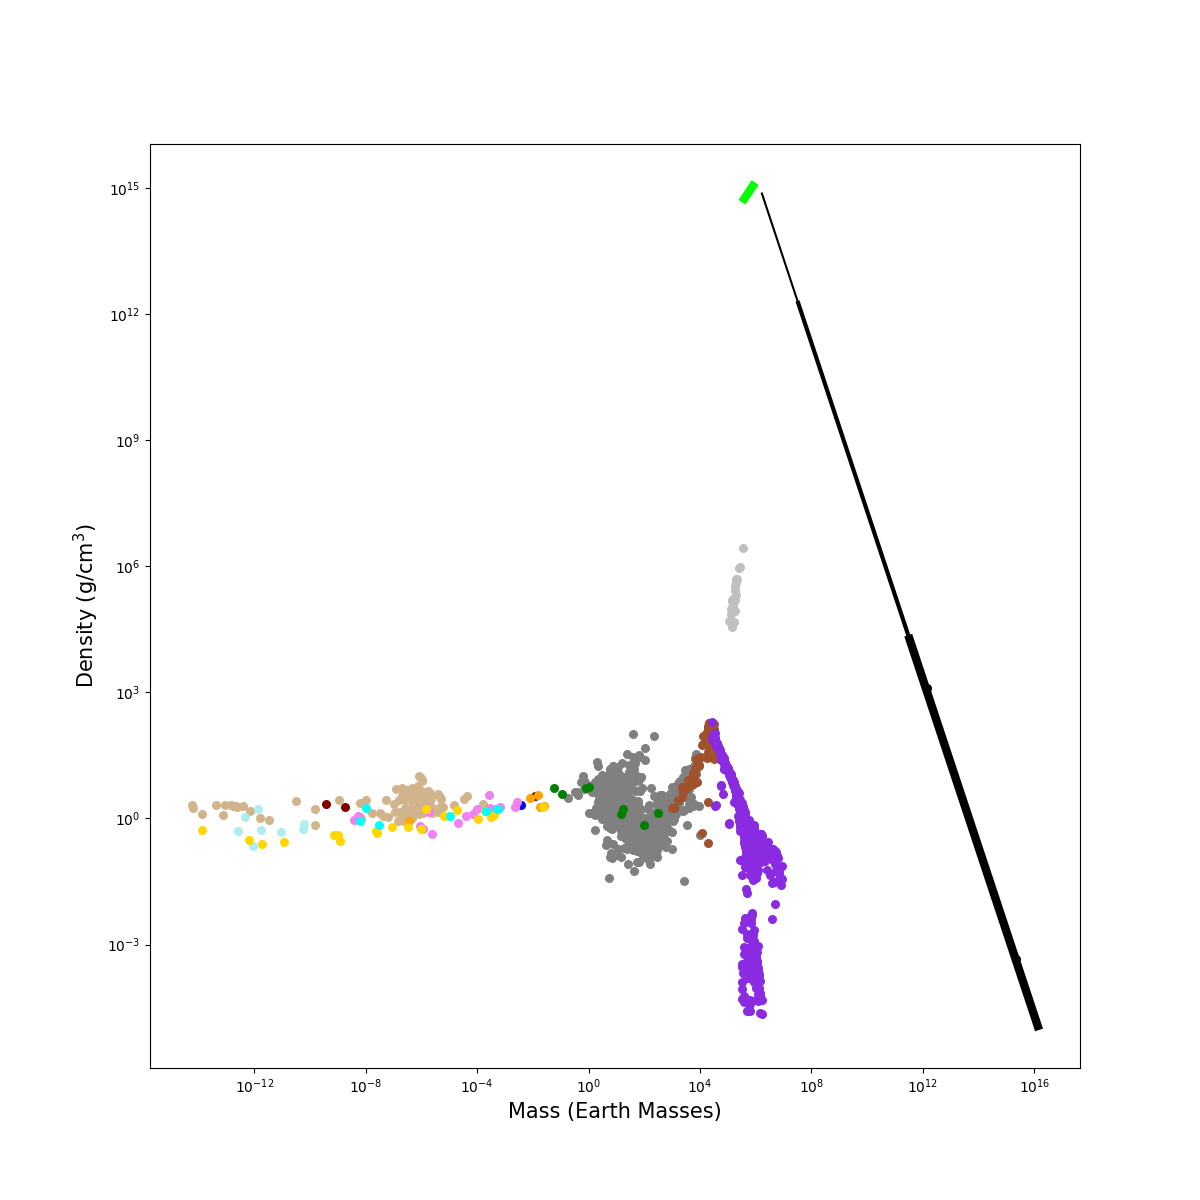

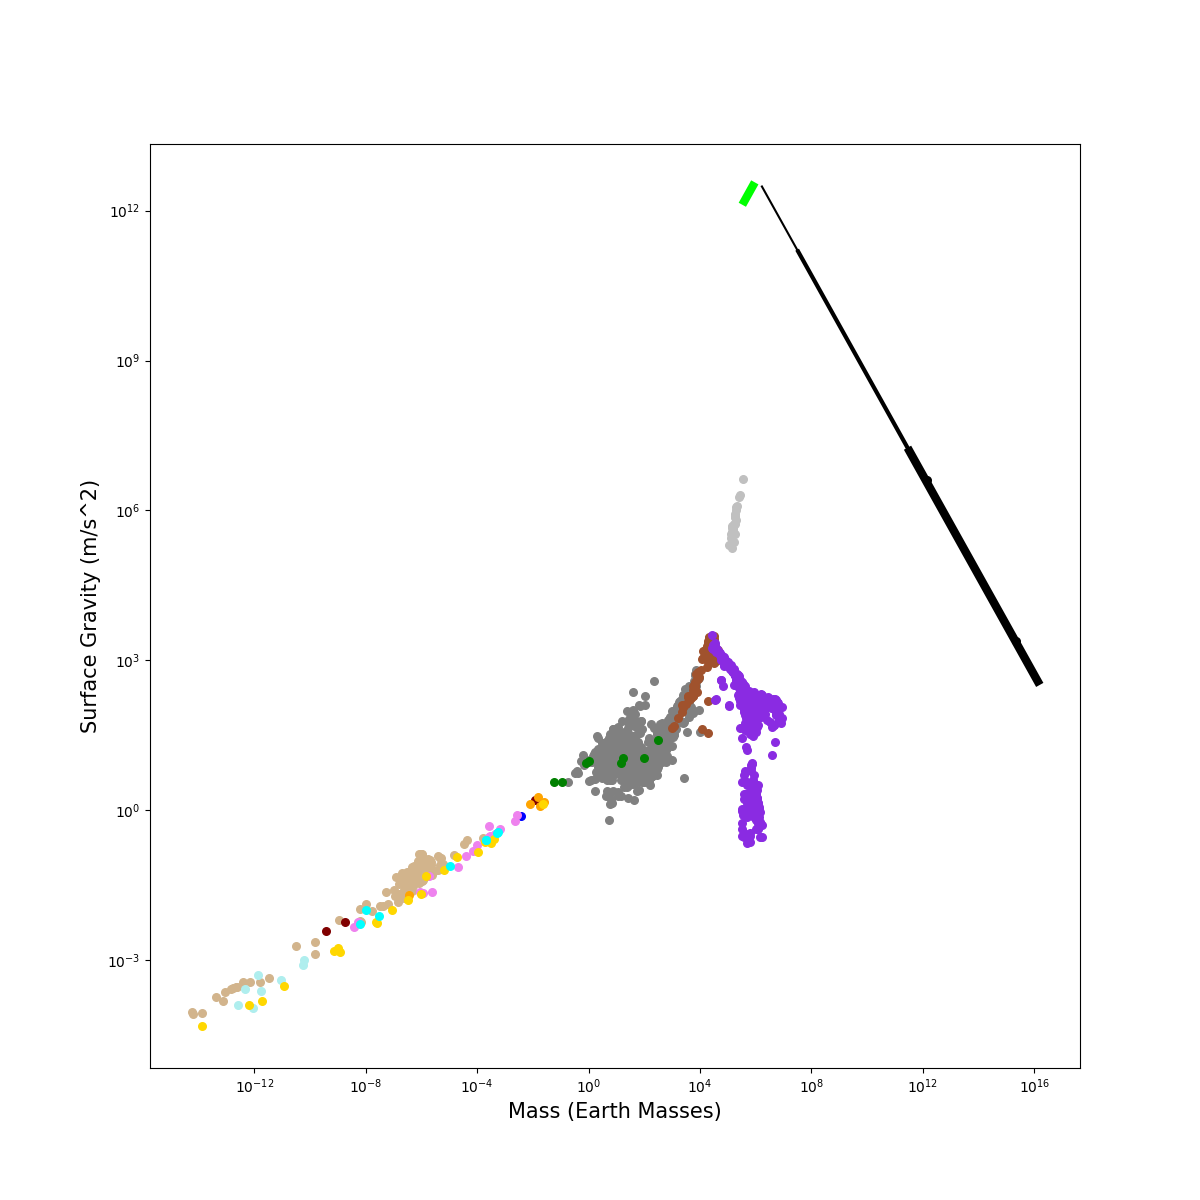

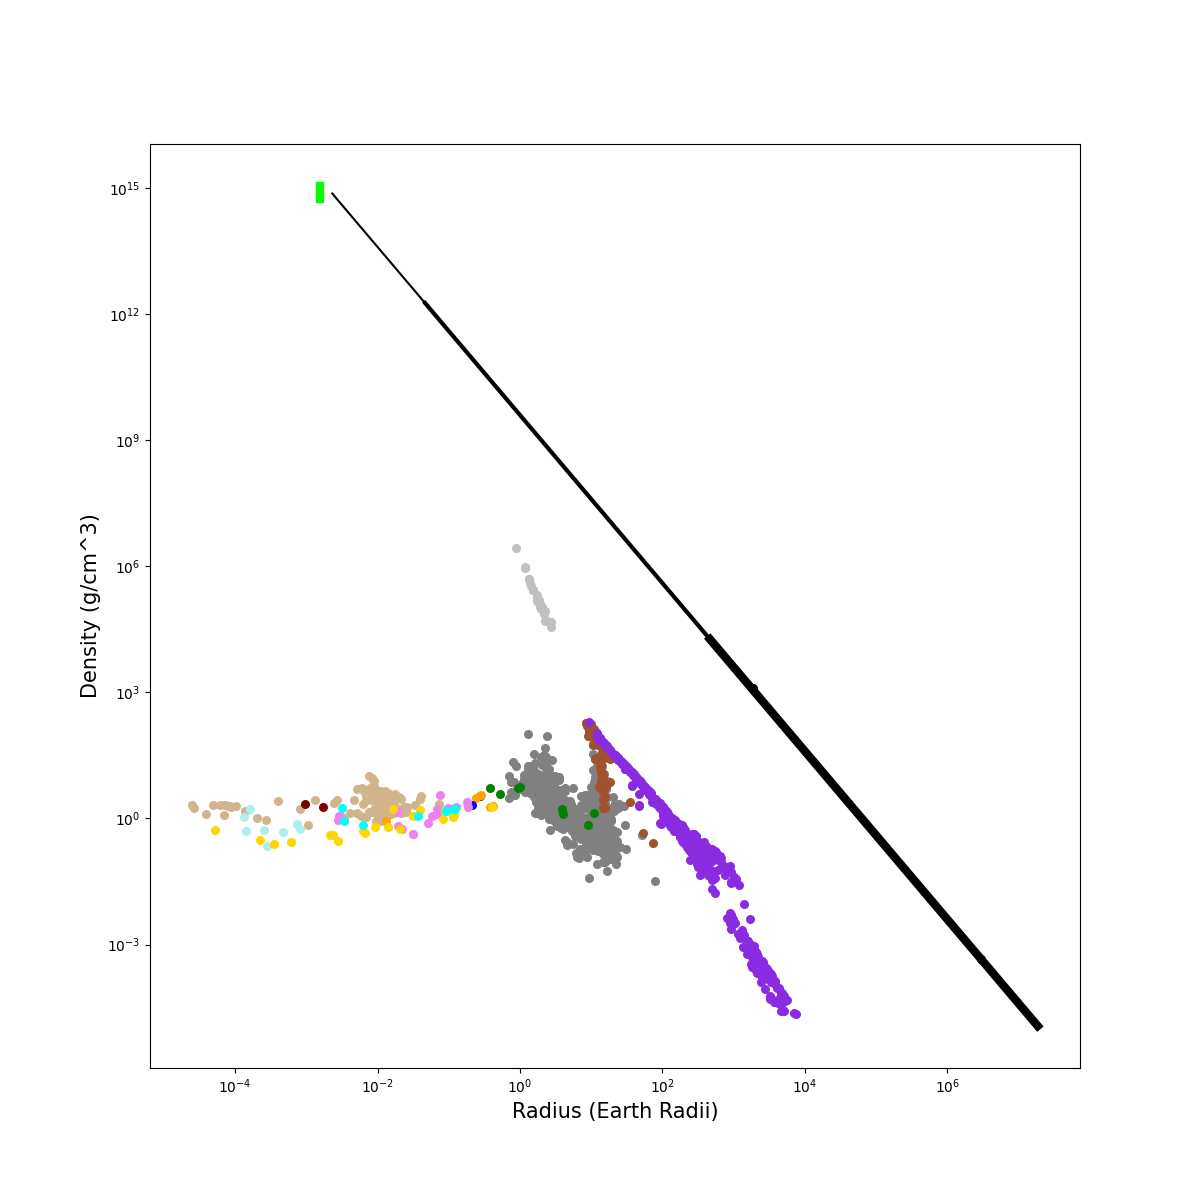

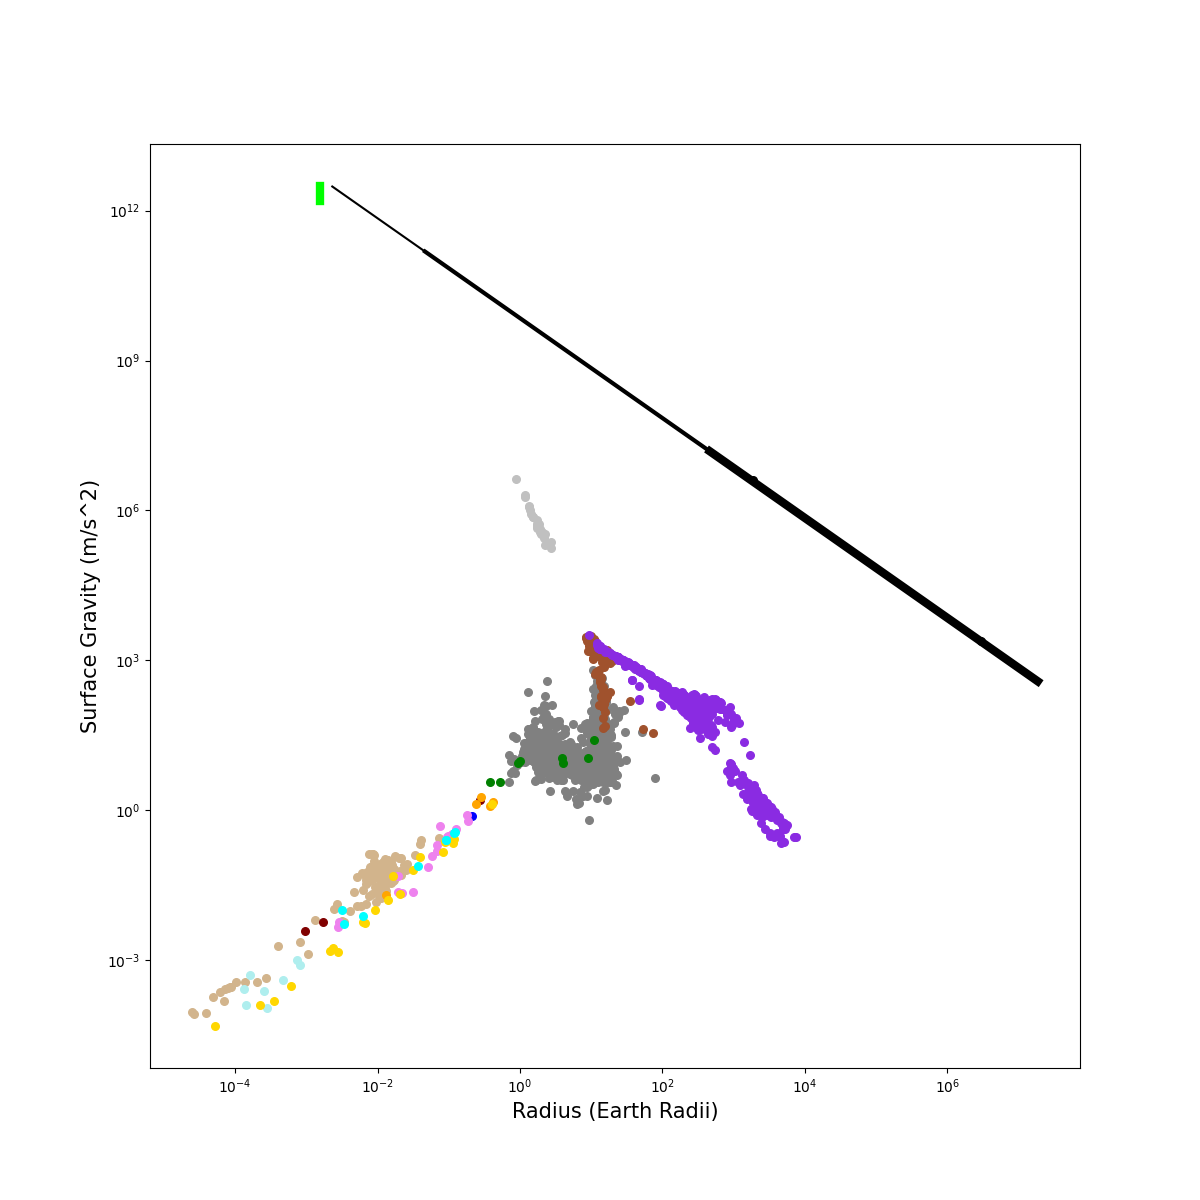

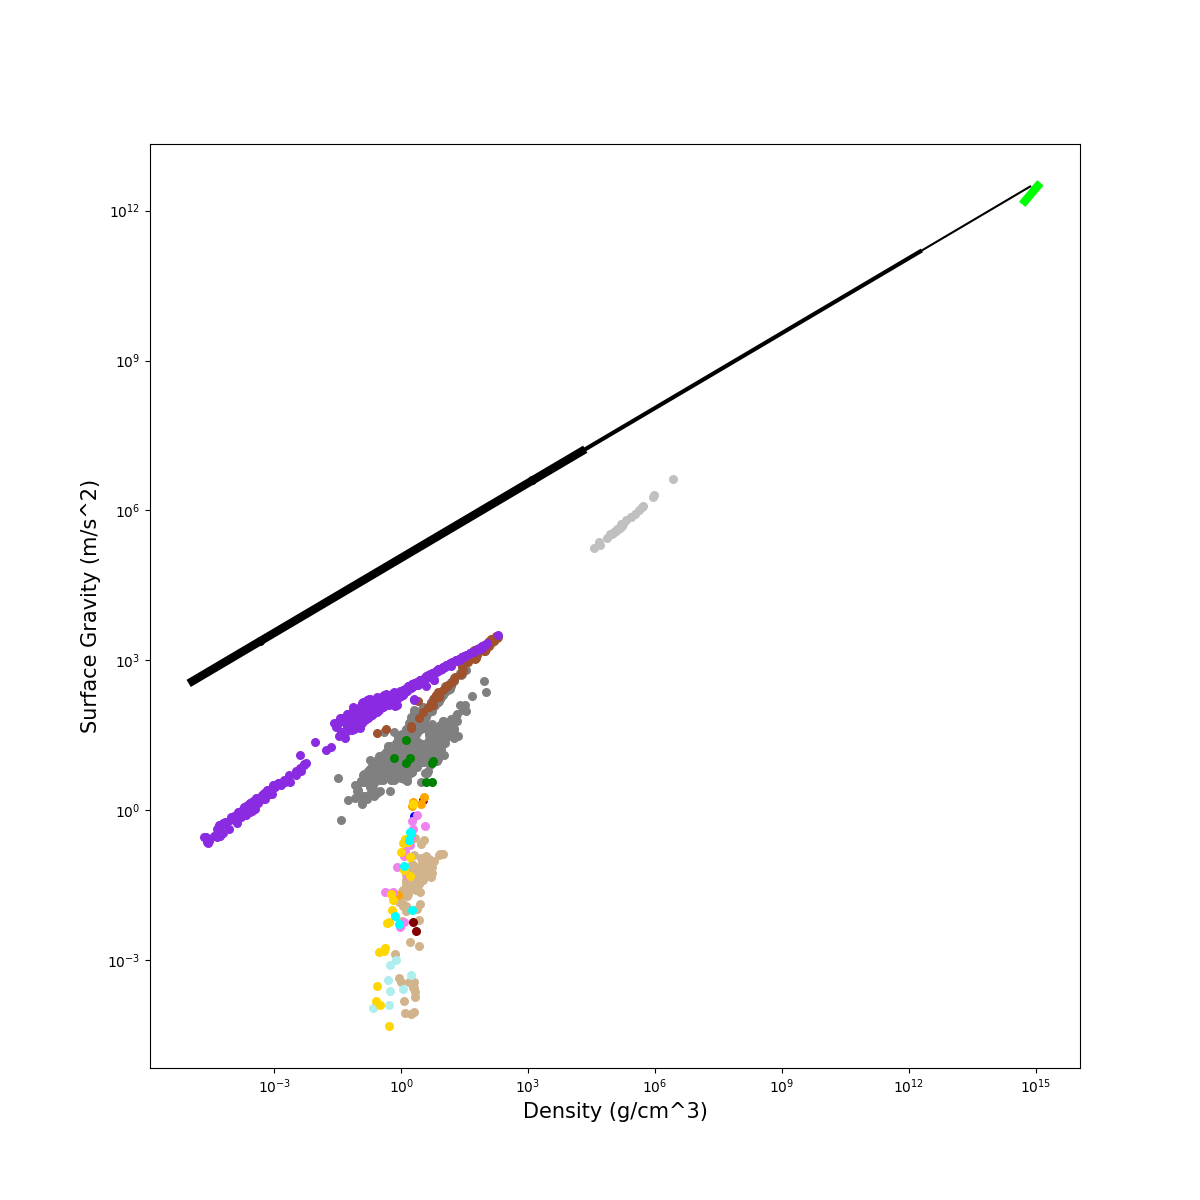

In [12]:
#All possible arrangements of parameters.
#One of the earlier plots in this notebook, lacks a lot of the features of the others. 

# More Bulky Graphs
size = 30

plt.figure(figsize=(12,12))

#Color based on type. Mass Radius.
plt.scatter(massI[np.where(typeI == 5)],radiI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(massI[np.where(typeI == 1)],radiI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(massI[np.where(typeI == 2)],radiI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(massI[np.where(typeI == 3)],radiI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(massI[np.where(typeI == 4)],radiI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(massI[np.where(typeI == 6)],radiI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(massI[np.where(typeI == 7)],radiI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(massI[np.where(typeI == 8)],radiI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(massI[np.where(typeI == 9)],radiI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 13)],radiI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 10)],radiI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 12)],radiI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(massI[np.where(typeI == 14)],radiI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(massI[np.where(typeI == 15)],radiI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(massI[np.where(typeI == 0)],radiI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([10/re,10/re]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhm[0:], bhr[0:], color='black') #Stellar Black Holes
plt.plot(bhm[3:], bhr[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhm[11:], bhr[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Radius (Earth Radii)', size=15)
plt.show

# Mass Density Plot
plt.figure(figsize=(12,12))
plt.scatter(massI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(massI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(massI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(massI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(massI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(massI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(massI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(massI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(massI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(massI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(massI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(massI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(massI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhm[0:], bhd[0:], color='black') #Stellar Black Holes
plt.plot(bhm[3:], bhd[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhm[11:], bhd[11:], color='black', linewidth=6) #Supermassive Black Holes
#plt.ylim([0.1,10])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Density (g/cm$^3$)', size=15)
plt.show

# Mass Gravity Plot
plt.figure(figsize=(12,12))
plt.scatter(massI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(massI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(massI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(massI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(massI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(massI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(massI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(massI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(massI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(massI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(massI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(massI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(massI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(massI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(massI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([1.17*ms/me, 2.35*ms/me]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhm[0:], bhg[0:], color='black') #Stellar Black Holes
plt.plot(bhm[3:], bhg[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhm[11:], bhg[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass (Earth Masses)', size=15)
plt.ylabel('Surface Gravity (m/s^2)', size=15)
plt.show

#Radius Density plot
plt.figure(figsize=(12,12))
plt.scatter(radiI[np.where(typeI == 5)],densI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(radiI[np.where(typeI == 1)],densI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(radiI[np.where(typeI == 2)],densI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(radiI[np.where(typeI == 3)],densI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(radiI[np.where(typeI == 4)],densI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(radiI[np.where(typeI == 6)],densI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(radiI[np.where(typeI == 7)],densI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(radiI[np.where(typeI == 8)],densI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(radiI[np.where(typeI == 9)],densI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 13)],densI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 10)],densI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(radiI[np.where(typeI == 11)],densI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(radiI[np.where(typeI == 12)],densI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(radiI[np.where(typeI == 14)],densI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(radiI[np.where(typeI == 15)],densI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(radiI[np.where(typeI == 0)],densI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([10/re,10/re]),np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhr[0:], bhd[0:], color='black') #Stellar Black Holes
plt.plot(bhr[3:], bhd[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhr[11:], bhd[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radius (Earth Radii)', size=15)
plt.ylabel('Density (g/cm^3)', size=15)
plt.show

#Radius Gravity plot
plt.figure(figsize=(12,12))
plt.scatter(radiI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(radiI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(radiI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(radiI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(radiI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(radiI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(radiI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(radiI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(radiI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(radiI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(radiI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(radiI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(radiI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(radiI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(radiI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([10/re,10/re]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhr[0:], bhg[0:], color='black') #Stellar Black Holes
plt.plot(bhr[3:], bhg[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhr[11:], bhg[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Radius (Earth Radii)', size=15)
plt.ylabel('Surface Gravity (m/s^2)', size=15)
plt.show

#Density Gravity plot
plt.figure(figsize=(12,12))
plt.scatter(densI[np.where(typeI == 5)],gI[np.where(typeI == 5)],color='gray', s=size)
plt.scatter(densI[np.where(typeI == 1)],gI[np.where(typeI == 1)],color='green', s=size)
plt.scatter(densI[np.where(typeI == 2)],gI[np.where(typeI == 2)],color='tan', s=size)
plt.scatter(densI[np.where(typeI == 3)],gI[np.where(typeI == 3)],color='sienna', s=size)
plt.scatter(densI[np.where(typeI == 4)],gI[np.where(typeI == 4)],color='paleturquoise', s=size)
plt.scatter(densI[np.where(typeI == 6)],gI[np.where(typeI == 6)],color='maroon', s=size)
plt.scatter(densI[np.where(typeI == 7)],gI[np.where(typeI == 7)],color='orange', s=size)
plt.scatter(densI[np.where(typeI == 8)],gI[np.where(typeI == 8)],color='blue', s=size)
plt.scatter(densI[np.where(typeI == 9)],gI[np.where(typeI == 9)],color='violet', s=size)
plt.scatter(densI[np.where(typeI == 13)],gI[np.where(typeI == 13)],color='violet', s=size)
plt.scatter(densI[np.where(typeI == 10)],gI[np.where(typeI == 10)],color='gold', s=size)
plt.scatter(densI[np.where(typeI == 11)],gI[np.where(typeI == 11)],color='blueviolet', s=size)
#plt.scatter(massI[np.where(typeI == 11)],radiI[np.where(typeI == 11)],
            #c=tempI[np.where(typeI == 11)],cmap='RdBu',vmin=2000,vmax=20000, s=60)
plt.scatter(densI[np.where(typeI == 12)],gI[np.where(typeI == 12)],color='black', s=size)
plt.scatter(densI[np.where(typeI == 14)],gI[np.where(typeI == 14)],color='cyan', s=size)
plt.scatter(densI[np.where(typeI == 15)],gI[np.where(typeI == 15)],color='silver', s=size)
plt.scatter(densI[np.where(typeI == 0)],gI[np.where(typeI == 0)],color='pink', s=size)
plt.plot(np.array([1.17*ms/(4*3.14/3)/(10)**3/1e12,2.35*ms/(4*3.14/3)/(10)**3/1e12]),np.array([6.67e-11*ms*1.17/10**2/1e6 ,6.67e-11*ms*2.35/10**2/1e6 ]),color='lime', linewidth=6) #Neutron Star Zone
plt.plot(bhd[0:], bhg[0:], color='black') #Stellar Black Holes
plt.plot(bhd[3:], bhg[3:], color='black', linewidth=3) #Intermediate Black Holes
plt.plot(bhd[11:], bhg[11:], color='black', linewidth=6) #Supermassive Black Holes

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Density (g/cm^3)', size=15)
plt.ylabel('Surface Gravity (m/s^2)', size=15)
plt.show

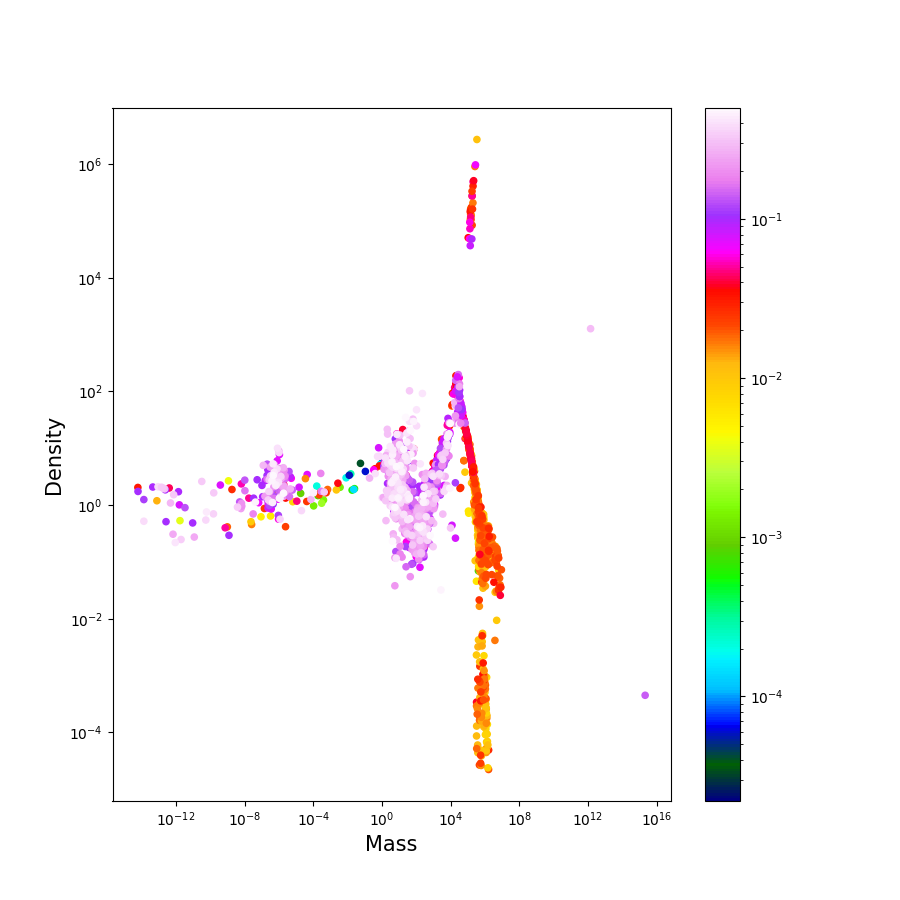

In [14]:
#Coloring the dots by error rather than type. 
#Was the first real plot made here, so lacks a lot of features of the others. 

plt.figure(figsize=(9,9))

#oh boy the options!
#Default option: just plot everything identically.
#plt.scatter(massI,radiI,color='green',s=10)

#Error plot: color points based on relative error.
plt.scatter(massI, densI, c=errI, cmap='gist_ncar', norm=mpl.colors.LogNorm(),s=20)
plt.colorbar()

#Temp plot: color based on temperature
#plt.scatter(massI, radiI, c=tempI, cmap='gist_ncar',norm=mpl.colors.LogNorm(vmin = 50),s=10)
#Using log scale actually removes the "-1" values, which is what we want.
#plt.colorbar()

#Temp plot: mass vs T, nothing fancy.
#plt.scatter(massI,tempI,color='green',s=10)
#plt.ylim([10,1e6])
# Limits required, black hole temps so low they ruin the plot.

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Mass', size=15)
plt.ylabel('Density', size=15)

#plt.savefig("errorColors.pdf", format="pdf", bbox_inches="tight")

plt.show()